In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from apyori import apriori
import random
import matplotlib.pyplot as plt

This next block contains various issues/imputes found within the original data which will have to be cleaned in order for any accurate modelling can be done to effectivly predict weather a given patient will be at risk or not based on the given attributes.

Indication catagory contains five outputs which is incorrect as one of the outputs was a spelling error of another output, meaning the is now rightfully 4 outputs for indication. Indication also contains missing data

Random contains duplicate inputs which is invalid as random is the only unique way to identify each row uniquely.

Id doesnt contains any duplicates meaning that no patients ever visit back to the hopital. A time frame isn't specified meaning the reason Id isn't repeated is that it's the data from a single day only

Diabetes contains missing data

Contra is considered an object type but should be a float type. Contra also contains a missing value

IPSI contains missing data 

Label contains 3 different types whereas it should either be risk or not risk and it also contains missing data

Hypertension also contains some missing values

# Cleaning Method 1.0

Cleaning method 1.0 will use the most basic of cleaning approaches by simply dropping any rows within the dataframe if they contain any nulls/inaccuracies.

### Fixing Random

The random column itself is found to not abide by the data description as it contains duplicated information in different rows.

In [2]:
data = pd.read_csv("600092_data.csv")
Simple_Cleaning_df = data.copy()

In [3]:
Simple_Cleaning_df 

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,A-F,no,yes,no,no,no,76.0,60,NoRisk
1516,0.253504,121814,A-F,no,no,yes,yes,no,90.0,75,Risk
1517,0.620373,101754,TIA,no,no,yes,no,no,75.0,20,NoRisk
1518,0.639342,263836,A-F,no,yes,no,no,no,70.0,45,NoRisk


In [4]:
Random_Duplicated_List = Simple_Cleaning_df.duplicated(subset = 'Random', keep='first')

In [5]:
Random_Duplicated_List

0       False
1        True
2        True
3       False
4       False
        ...  
1515     True
1516    False
1517    False
1518    False
1519    False
Length: 1520, dtype: bool

In [6]:
counter = -1
RandomListCounter = []
for item in Random_Duplicated_List:
    counter = counter + 1
    if item == True:
        RandomListCounter.append(counter)

for index, row in Simple_Cleaning_df.iterrows():
    if index in RandomListCounter:
        z = Simple_Cleaning_df.loc[index, :]
        z['Random'] = 'Duplicated'
        Simple_Cleaning_df.loc[index, :] = z
    elif index not in RandomListCounter:
        z = Simple_Cleaning_df.loc[index, :]
        z['Random'] = 'Not Duplicated'
        Simple_Cleaning_df.loc[index, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [7]:
Simple_Cleaning_df

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,Not Duplicated,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,Duplicated,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,Duplicated,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,Not Duplicated,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,Not Duplicated,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,Duplicated,93406,A-F,no,yes,no,no,no,76.0,60,NoRisk
1516,Not Duplicated,121814,A-F,no,no,yes,yes,no,90.0,75,Risk
1517,Not Duplicated,101754,TIA,no,no,yes,no,no,75.0,20,NoRisk
1518,Not Duplicated,263836,A-F,no,yes,no,no,no,70.0,45,NoRisk


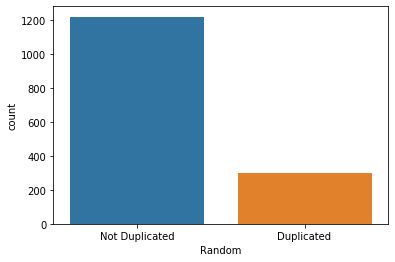

In [8]:
ax = sns.countplot(x="Random", data=Simple_Cleaning_df)

In [9]:
Simple_Cleaning_df = Simple_Cleaning_df.drop(['Random'], axis=1)

In [10]:
Simple_Cleaning_df

,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...
1515,93406,A-F,no,yes,no,no,no,76.0,60,NoRisk
1516,121814,A-F,no,no,yes,yes,no,90.0,75,Risk
1517,101754,TIA,no,no,yes,no,no,75.0,20,NoRisk
1518,263836,A-F,no,yes,no,no,no,70.0,45,NoRisk


### Fixing ID

The ID column doesn't match the as it doesn't contain any repeating patient numbers meaning no patient returns after their initial appointment. This could be valid as the recorded information about the patient could be due to the fact that the patient information was recorded over a single day making sense for a patient to not return. ID column will be dropped due to the fact that it contains no relevant information towards any of the medical columns and it increases the search space for modelling with no correlation towards any of the other columns in the dataframe.

In [11]:
Simple_Cleaning_df = Simple_Cleaning_df.drop(['Id'], axis=1)

### Fixing Indication

Indication contains 5 different types whereas in the data dictionary it's specified to only contain 4. This error is due to a spelling mistake which is fixed as ASx is spelt as Asx causing it to add an extra catagory of indication to the column.

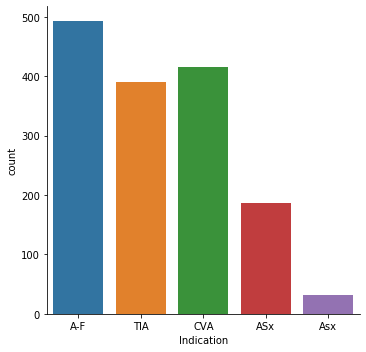

In [12]:
sns.catplot('Indication', data=Simple_Cleaning_df, kind="count")

In [13]:
list_indication_Asx = []
for index, row in Simple_Cleaning_df.iterrows():
    if row['Indication'] == 'Asx':
        print(index, row)
        list_indication_Asx.append(index)

68 Indication       Asx
Diabetes         yes
IHD              yes
Hypertension     yes
Arrhythmia        no
History           no
IPSI              75
Contra           100
label           Risk
Name: 68, dtype: object
111 Indication       Asx
Diabetes         yes
IHD              yes
Hypertension     yes
Arrhythmia       yes
History           no
IPSI              99
Contra            75
label           Risk
Name: 111, dtype: object
131 Indication       Asx
Diabetes          no
IHD              yes
Hypertension     yes
Arrhythmia       yes
History           no
IPSI              75
Contra           100
label           Risk
Name: 131, dtype: object
172 Indication       Asx
Diabetes         yes
IHD              yes
Hypertension     yes
Arrhythmia        no
History           no
IPSI              90
Contra            95
label           Risk
Name: 172, dtype: object
177 Indication       Asx
Diabetes          no
IHD              yes
Hypertension     yes
Arrhythmia       yes
History           no


In [14]:
for index, row in Simple_Cleaning_df.iterrows():
    if index in list_indication_Asx:
        Simple_Cleaning_df.drop(index, inplace = True)

In [15]:
Simple_Cleaning_df = Simple_Cleaning_df.reset_index()

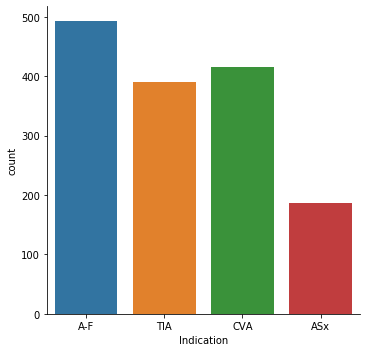

In [16]:
sns.catplot('Indication', data=Simple_Cleaning_df, kind="count")

### Fixing Diabetes

The diabetes column contains 2 rows which do not contain any value for diabetes. As these rows are considered null they will be dropped.

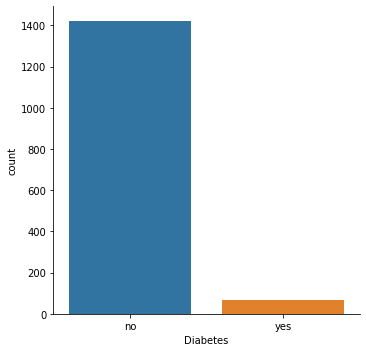

In [17]:
sns.catplot('Diabetes', data=Simple_Cleaning_df, kind="count")

In [18]:
diabetes_Null = Simple_Cleaning_df['Diabetes'].isnull

In [19]:
counter = -1
diabetes_null_counter = []
for item in diabetes_Null():
    counter = counter + 1
    if item == True:
        print(counter)
        diabetes_null_counter.append(counter)

439
505


In [20]:
Simple_Cleaning_df[439:440]

,index,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
439,447,CVA,NaN,yes,yes,yes,no,90.0,100,Risk


In [21]:
Simple_Cleaning_df[505:506]

,index,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
505,514,A-F,NaN,no,yes,no,no,80.0,40,NoRisk


In [22]:
for index, row in Simple_Cleaning_df.iterrows():
    if index in diabetes_null_counter:
        Simple_Cleaning_df.drop(index, inplace = True)

### Fixing IHD

In [23]:
counterIHDyes = 0
counterIHDno = 0

for index, row in Simple_Cleaning_df.iterrows():
    if row['IHD'] == 'yes':
        counterIHDyes = counterIHDyes + 1
    elif row['IHD'] == 'no':
        counterIHDno = counterIHDno + 1
print(counterIHDyes, counterIHDno)

686 800


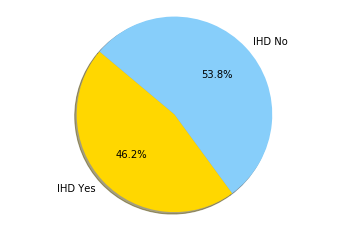

In [24]:
labels = 'IHD Yes', 'IHD No'
sizes = [counterIHDyes, counterIHDno]
colors = ['gold', 'lightskyblue']
explode = (0, 0)


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [25]:
IHD_null = Simple_Cleaning_df['IHD'].isnull()

In [26]:
counter = -1
for item in IHD_null:
    counter = counter + 1
    if item == True:
        print(counter)

In [27]:
Simple_Cleaning_df['IHD'].describe()

count     1486
unique       2
top         no
freq       800
Name: IHD, dtype: object

The IHD column is found to not contain any missing data and is also of the correct D-Type.

### Fixing Hypertension

In [28]:
hypertension_null = Simple_Cleaning_df['Hypertension'].isnull()

In [29]:
counter = -1
hypertension_null_list = []
for item in hypertension_null:
    counter = counter + 1
    if item == True:
        hypertension_null_list.append(counter)

In [30]:
hypertension_null_list

[195, 579, 964]

In [31]:
Simple_Cleaning_df.reset_index(inplace = True) 

In [32]:
for index, row in Simple_Cleaning_df.iterrows():
    if index in hypertension_null_list:
        Simple_Cleaning_df.drop(index, inplace = True)

### Fixing Arrhythmia

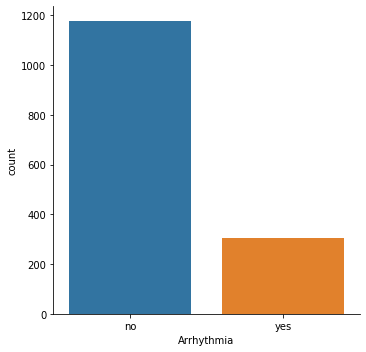

In [33]:
sns.catplot('Arrhythmia', data=Simple_Cleaning_df, kind="count")

In [34]:
arrhythmia_null = Simple_Cleaning_df['Arrhythmia'].isnull()

In [35]:
counter = -1
for item in arrhythmia_null:
    counter = counter + 1
    if item == True:
        print(counter)

In [36]:
for index, row in Simple_Cleaning_df.iterrows():
    if (row['Arrhythmia'] != 'yes') and (row['Arrhythmia'] != 'no'):
        print(row)

The Arrhythmia column doesn't contain any inaccuracies as it doesn't contain any missing data and is of the correct D-Type and doesn't contain any irregular values.

### Fixing History

In [37]:
counterHISTORYyes = 0
counterHISTORYno = 0

for index, row in Simple_Cleaning_df.iterrows():
    if row['History'] == 'yes':
        counterHISTORYyes = counterHISTORYyes + 1
    elif row['History'] == 'no':
        counterHISTORYno = counterHISTORYno + 1
print(counterHISTORYyes, counterHISTORYno)    

24 1457


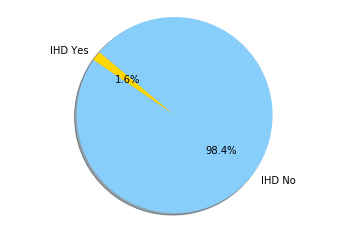

In [38]:
labels = 'IHD Yes', 'IHD No'
sizes = [counterHISTORYyes, counterHISTORYno]
colors = ['gold', 'lightskyblue']
explode = (0, 0)


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [39]:
history_nan = []
for index, row in Simple_Cleaning_df.iterrows():
    if (row['History'] != 'yes') and (row['History'] != 'no'):
        print(index, row)
        history_nan.append(index)

331 level_0            331
index              337
Indication         CVA
Diabetes            no
IHD                yes
Hypertension        no
Arrhythmia          no
History            NaN
IPSI                85
Contra              50
label           NoRisk
Name: 331, dtype: object
771 level_0          773
index            784
Indication       CVA
Diabetes          no
IHD               no
Hypertension     yes
Arrhythmia       yes
History          NaN
IPSI              95
Contra           100
label           Risk
Name: 771, dtype: object


In [40]:
history_nan

[331, 771]

In [41]:
for index, row in Simple_Cleaning_df.iterrows():
    if index in history_nan:
        print(row)
        Simple_Cleaning_df.drop(index, inplace = True)

level_0            331
index              337
Indication         CVA
Diabetes            no
IHD                yes
Hypertension        no
Arrhythmia          no
History            NaN
IPSI                85
Contra              50
label           NoRisk
Name: 331, dtype: object
level_0          773
index            784
Indication       CVA
Diabetes          no
IHD               no
Hypertension     yes
Arrhythmia       yes
History          NaN
IPSI              95
Contra           100
label           Risk
Name: 771, dtype: object


The history column contains 2 rows which are considered null and therefore are dropped as those null rows are considered inaccurate.

### Removing Uneccessary Columns

In [42]:
Simple_Cleaning_df = Simple_Cleaning_df.drop(['level_0'], axis = 1)

In [43]:
Simple_Cleaning_df = Simple_Cleaning_df.reset_index()
Simple_Cleaning_df = Simple_Cleaning_df.drop(['index'], axis = 1)
Simple_Cleaning_df = Simple_Cleaning_df.drop(['level_0'], axis = 1)

In [44]:
Simple_Cleaning_df

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,TIA,no,no,no,no,no,70.0,60,NoRisk
2,A-F,no,yes,yes,no,no,95.0,40,Risk
3,TIA,no,no,yes,no,no,90.0,85,Risk
4,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...
1476,A-F,no,yes,no,no,no,76.0,60,NoRisk
1477,A-F,no,no,yes,yes,no,90.0,75,Risk
1478,TIA,no,no,yes,no,no,75.0,20,NoRisk
1479,A-F,no,yes,no,no,no,70.0,45,NoRisk


The index and level_0 columns are dropped as they do not show the true number of rows in the dataframe and are consirdered not as useful and are therefore removed. 

### Fixing IPSI

In [45]:
IPSI_null = Simple_Cleaning_df['IPSI'].isnull()

In [46]:
counter = -1
IPSI_null_list = []
for item in IPSI_null:
    counter = counter + 1
    if item == True:
        IPSI_null_list.append(counter)

In [47]:
IPSI_null_list

[606, 737, 826, 894]

In [48]:
Simple_Cleaning_df[606:607]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
606,A-F,no,no,no,no,no,NaN,100,Risk


In [49]:
for index, row in Simple_Cleaning_df.iterrows():
    if index in IPSI_null_list:
        print(row)
        Simple_Cleaning_df.drop(index, inplace = True)

Indication       A-F
Diabetes          no
IHD               no
Hypertension      no
Arrhythmia        no
History           no
IPSI             NaN
Contra           100
label           Risk
Name: 606, dtype: object
Indication       CVA
Diabetes          no
IHD              yes
Hypertension     yes
Arrhythmia       yes
History           no
IPSI             NaN
Contra           100
label           Risk
Name: 737, dtype: object
Indication         CVA
Diabetes            no
IHD                 no
Hypertension        no
Arrhythmia          no
History             no
IPSI               NaN
Contra              20
label           NoRisk
Name: 826, dtype: object
Indication         A-F
Diabetes            no
IHD                 no
Hypertension        no
Arrhythmia          no
History             no
IPSI               NaN
Contra              50
label           NoRisk
Name: 894, dtype: object


The IPSI column contained 4 null rows and are therefore removed from the dataframe.

### Fixing Contra

In [50]:
Contra_null = Simple_Cleaning_df['Contra'].isnull()

In [51]:
Contra_null

0       False
1       False
2       False
3       False
4       False
        ...  
1476    False
1477    False
1478    False
1479    False
1480    False
Name: Contra, Length: 1477, dtype: bool

In [52]:
counter = -1
for item in Contra_null:
    counter = counter + 1
    if item == True:
        print(counter)

In [53]:
for index, row in Simple_Cleaning_df.iterrows():
    if row['Contra'].isspace():
        print(index, row)
        Simple_Cleaning_df.drop(index, inplace = True)

442 Indication         ASx
Diabetes            no
IHD                 no
Hypertension       yes
Arrhythmia          no
History             no
IPSI                70
Contra                
label           NoRisk
Name: 442, dtype: object


In [54]:
Simple_Cleaning_df['Contra'].describe()

count     1476
unique      38
top        100
freq       227
Name: Contra, dtype: object

In [55]:
Simple_Cleaning_df['Contra'] = pd.to_numeric(Simple_Cleaning_df['Contra'])

The contra column does not technically contain any null rows as the D-Type of the row is a object therefore the isnull() method call wouldn't work with the Contra column. Instead in order to find if a row within the Contra column is null you would have to call the isspace() method which returns a single row which doesn't contain any value for Contra.

Also the contra row is converted from the object datatype to a int32 datatype as it should based on the spec of the dataframe.

### Reseting The Index

In [56]:
Simple_Cleaning_df.reset_index(drop=True, inplace=True)

In [57]:
Simple_Cleaning_df

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,TIA,no,no,no,no,no,70.0,60,NoRisk
2,A-F,no,yes,yes,no,no,95.0,40,Risk
3,TIA,no,no,yes,no,no,90.0,85,Risk
4,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...
1471,A-F,no,yes,no,no,no,76.0,60,NoRisk
1472,A-F,no,no,yes,yes,no,90.0,75,Risk
1473,TIA,no,no,yes,no,no,75.0,20,NoRisk
1474,A-F,no,yes,no,no,no,70.0,45,NoRisk


### Fixing Label

In [58]:
label_null = Simple_Cleaning_df['label'].isnull()

In [59]:
counter = -1
label_null_list = []
for item in label_null:
    counter = counter + 1
    if item == True:
        label_null_list.append(counter)

In [60]:
label_null_list

[791, 946, 1380]

In [61]:
for index, row in Simple_Cleaning_df.iterrows():
    if index in label_null_list:
        print(index, row)
        Simple_Cleaning_df.drop(index, inplace = True)

791 Indication      CVA
Diabetes         no
IHD             yes
Hypertension    yes
Arrhythmia       no
History          no
IPSI             76
Contra           50
label           NaN
Name: 791, dtype: object
946 Indication      CVA
Diabetes         no
IHD             yes
Hypertension    yes
Arrhythmia      yes
History          no
IPSI             80
Contra           70
label           NaN
Name: 946, dtype: object
1380 Indication      TIA
Diabetes        yes
IHD              no
Hypertension     no
Arrhythmia       no
History         yes
IPSI             90
Contra           50
label           NaN
Name: 1380, dtype: object


In [62]:
for index, row in Simple_Cleaning_df.iterrows():
    if (row['label'] != 'NoRisk') and (row['label'] != 'Risk'):
        print(index, row)
        Simple_Cleaning_df.drop(index, inplace = True)

462 Indication          ASx
Diabetes             no
IHD                 yes
Hypertension        yes
Arrhythmia           no
History              no
IPSI                 70
Contra               55
label           Unknown
Name: 462, dtype: object
509 Indication          CVA
Diabetes             no
IHD                  no
Hypertension        yes
Arrhythmia          yes
History              no
IPSI                 95
Contra              100
label           Unknown
Name: 509, dtype: object


In [63]:
Simple_Cleaning_df

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,TIA,no,no,no,no,no,70.0,60,NoRisk
2,A-F,no,yes,yes,no,no,95.0,40,Risk
3,TIA,no,no,yes,no,no,90.0,85,Risk
4,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...
1471,A-F,no,yes,no,no,no,76.0,60,NoRisk
1472,A-F,no,no,yes,yes,no,90.0,75,Risk
1473,TIA,no,no,yes,no,no,75.0,20,NoRisk
1474,A-F,no,yes,no,no,no,70.0,45,NoRisk


In [64]:
Simple_Cleaning_df.reset_index(drop=True, inplace=True)

In [65]:
Simple_Cleaning_df

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,TIA,no,no,no,no,no,70.0,60,NoRisk
2,A-F,no,yes,yes,no,no,95.0,40,Risk
3,TIA,no,no,yes,no,no,90.0,85,Risk
4,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...
1466,A-F,no,yes,no,no,no,76.0,60,NoRisk
1467,A-F,no,no,yes,yes,no,90.0,75,Risk
1468,TIA,no,no,yes,no,no,75.0,20,NoRisk
1469,A-F,no,yes,no,no,no,70.0,45,NoRisk


The first type of cleaning has now been complete where Simple_Cleaning_df doesn't contain any unexpected values in any of the rows within any column as all imputes have been dropped from the given dataframe.

# Cleaning Method 2.0

Cleaning method 2.0 will be more advanced than cleaning method 1.0 as instead of dropping any null values/unexpected values, various different method will be employed in order to determine a more accurate value for the imputes. As dropping any impute reduces the dataset which leads to less available data for modelling.

In [66]:
dataset_second_cleaning = data.copy()

In [67]:
dataset_second_cleaning

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,A-F,no,yes,no,no,no,76.0,60,NoRisk
1516,0.253504,121814,A-F,no,no,yes,yes,no,90.0,75,Risk
1517,0.620373,101754,TIA,no,no,yes,no,no,75.0,20,NoRisk
1518,0.639342,263836,A-F,no,yes,no,no,no,70.0,45,NoRisk


### Fixing Random Cleaning 2.0

In order to fix the Random column as it contains duplicates I will remove all duplicates by assigning each duplicated random number with a new values which isn't repeated in the dataframe. Therefore fixing the random column.

In [68]:
Random_duplicate = dataset_second_cleaning.duplicated(subset = 'Random', keep=False)

In [69]:
Random_List = []
counter = -1
for item in Random_duplicate:
    counter = counter + 1
    if item == True:
        Random_List.append(counter)

In [70]:
Random_List2 = []
for index, row in dataset_second_cleaning.iterrows():
    if index in Random_List:
        Random_List2.append(row)

In [71]:
for item in Random_List2:
    randomNumber = random.uniform(0, 1)
    if randomNumber != dataset_second_cleaning['Random'].count():
        item['Random'] = randomNumber

In [72]:
Random_List3 = []
for item in Random_List2:
    Random_List3.append(item['Random'])

In [73]:
counter = -1
for index, row in dataset_second_cleaning.iterrows():
    if index in Random_List:
        counter = counter + 1
        z = dataset_second_cleaning.loc[index, 'Random']
        z = Random_List3[counter]
        dataset_second_cleaning.loc[index,'Random'] = z

Random and Id do each-others functions as random is duplicated and Id is unique implying that both the random and ID column could be swapped in order to find another way to solve this problem

The approach above used to fix the random issue was to locate every duplicate row, once located add those given rows to a list which would then have the random number swapped for another number which would be created by a random function, by doing this the random duplicate numbers would no longer contain any duplicate information. Once each duplicate row has been changed in the random column the row is then added back the dataframe ensuring each row contains a unique column

### Fixing Indication Cleaning 2.0

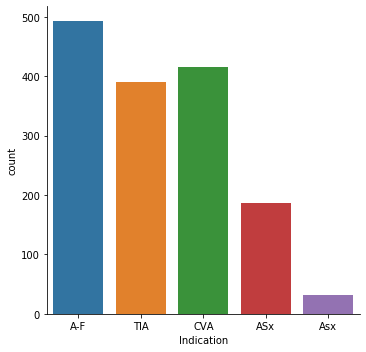

In [74]:
sns.catplot('Indication', data=dataset_second_cleaning, kind="count")

In [75]:
dataset_second_cleaning = dataset_second_cleaning.replace(to_replace = 'Asx', value = "ASx")

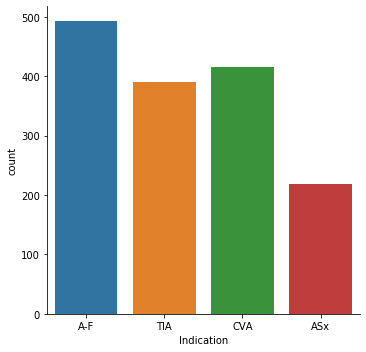

In [76]:
sns.catplot('Indication', data=dataset_second_cleaning, kind="count")

In [77]:
indication_null = dataset_second_cleaning['Indication'].isnull()

In [78]:
counter = -1
indication_null_list = []

for item in indication_null:
    counter = counter + 1
    if item == True:
        indication_null_list.append(counter)

In [79]:
indication_null_list

[442, 822, 1007]

In [80]:
indication_null_row = []

for index, row in dataset_second_cleaning.iterrows():
    if index in indication_null_list:
        indication_null_row.append(row)

In [81]:
indication_null_row

[Random          0.648122
 Id                261060
 Indication           NaN
 Diabetes              no
 IHD                  yes
 Hypertension         yes
 Arrhythmia            no
 History               no
 IPSI                  70
 Contra                40
 label             NoRisk
 Name: 442, dtype: object, Random          0.355452
 Id                205845
 Indication           NaN
 Diabetes              no
 IHD                  yes
 Hypertension          no
 Arrhythmia            no
 History               no
 IPSI                  80
 Contra               100
 label               Risk
 Name: 822, dtype: object, Random          0.761219
 Id                256076
 Indication           NaN
 Diabetes              no
 IHD                   no
 Hypertension          no
 Arrhythmia           yes
 History              yes
 IPSI                  99
 Contra               100
 label               Risk
 Name: 1007, dtype: object]

In [82]:
counter1 = 0
counter2 = 0
counter3 = 0
counter4 = 0
for index, row in dataset_second_cleaning.iterrows():
    if row['Diabetes'] == 'no' and row['IHD'] == 'yes' and row['Hypertension'] == 'yes' and row['Arrhythmia'] == 'no' and row['History'] == 'no' and row['label'] == 'NoRisk':
        if row['Indication'] == 'A-F':
            counter1 = counter1 + 1
        if row['Indication'] == 'CVA':
            counter2 = counter2 + 1
        if row['Indication'] == 'TIA':
            counter3 = counter3 + 1
        if row['Indication'] == 'ASx':
            counter4 = counter4 + 1
print(counter1, counter2, counter3, counter4)

31 38 48 8


In [83]:
counter1 = 0
counter2 = 0
counter3 = 0
counter4 = 0
for index, row in dataset_second_cleaning.iterrows():
    if row['Diabetes'] == 'no' and row['IHD'] == 'yes' and row['Hypertension'] == 'no' and row['Arrhythmia'] == 'no' and row['History'] == 'no' and row['label'] == 'Risk':
        if row['Indication'] == 'A-F':
            counter1 = counter1 + 1
        if row['Indication'] == 'CVA':
            counter2 = counter2 + 1
        if row['Indication'] == 'TIA':
            counter3 = counter3 + 1
        if row['Indication'] == 'ASx':
            counter4 = counter4 + 1
print(counter1, counter2, counter3, counter4)

11 0 7 0


In [84]:
counter1 = 0
counter2 = 0
counter3 = 0
counter4 = 0
for index, row in dataset_second_cleaning.iterrows():
    if row['Diabetes'] == 'no' and row['IHD'] == 'no' and row['Hypertension'] == 'no' and row['Arrhythmia'] == 'yes' and row['History'] == 'yes' and row['label'] == 'Risk':
        if row['Indication'] == 'A-F':
            counter1 = counter1 + 1
        if row['Indication'] == 'CVA':
            counter2 = counter2 + 1
        if row['Indication'] == 'TIA':
            counter3 = counter3 + 1
        if row['Indication'] == 'ASx':
            counter4 = counter4 + 1
print(counter1, counter2, counter3, counter4)

0 4 0 0


In [85]:
counter = -1
for index, row in dataset_second_cleaning.iterrows():
    counter = counter + 1
    if row['Id'] == 261060:
        z = dataset_second_cleaning.loc[counter, :]
        z['Indication'] = 'TIA'
        dataset_second_cleaning.loc[counter, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [86]:
counter = -1
for index, row in dataset_second_cleaning.iterrows():
    counter = counter + 1
    if row['Id'] ==  205845:
        z = dataset_second_cleaning.loc[counter, :]
        z['Indication'] = 'A-F'
        dataset_second_cleaning.loc[counter, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [87]:
counter = -1
for index, row in dataset_second_cleaning.iterrows():
    counter = counter + 1
    if row['Id'] ==  256076:
        z = dataset_second_cleaning.loc[counter, :]
        z['Indication'] = 'CVA'
        dataset_second_cleaning.loc[counter, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [88]:
dataset_second_cleaning['Indication'].describe()

count     1520
unique       4
top        A-F
freq       494
Name: Indication, dtype: object

### Fixing Diabetes Cleaning 2.0 

In [89]:
counterdiabetesyes = 0
counterdiabetesno = 0
counterdiabetesnull = 0

for index, row in dataset_second_cleaning.iterrows():
    if row['Diabetes'] == 'yes':
        counterdiabetesyes = counterdiabetesyes + 1
    elif row['Diabetes'] == 'no':
        counterdiabetesno = counterdiabetesno + 1
    else:
        counterdiabetesnull = counterdiabetesnull + 1
print(counterHISTORYyes, counterHISTORYno, counterdiabetesnull)   

24 1457 2


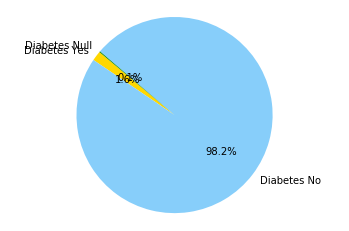

In [90]:
labels = 'Diabetes Yes', 'Diabetes No', 'Diabetes Null' 
sizes = [counterHISTORYyes, counterHISTORYno, counterdiabetesnull]
colors = ['gold', 'lightskyblue', 'green']
explode = (0, 0, 0)


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')
plt.show()

In [91]:
dataset_second_cleaning['Diabetes'].describe()

count     1518
unique       2
top         no
freq      1441
Name: Diabetes, dtype: object

In [92]:
Null_Diabetes = dataset_second_cleaning['Diabetes'].isnull()

In [93]:
count = -1
Null_Diabetes_Index = []
for item in Null_Diabetes:
    count = count + 1
    if item == True:
        Null_Diabetes_Index.append(count)
Null_Diabetes_Index

[447, 514]

In [94]:
Null_Diabetes_row = []
for index, row in dataset_second_cleaning.iterrows():
    if index in Null_Diabetes_Index:
        Null_Diabetes_row.append(row)
Null_Diabetes_row

[Random          0.513766
 Id                224257
 Indication           CVA
 Diabetes             NaN
 IHD                  yes
 Hypertension         yes
 Arrhythmia           yes
 History               no
 IPSI                  90
 Contra               100
 label               Risk
 Name: 447, dtype: object, Random          0.39213
 Id               210861
 Indication          A-F
 Diabetes            NaN
 IHD                  no
 Hypertension        yes
 Arrhythmia           no
 History              no
 IPSI                 80
 Contra               40
 label            NoRisk
 Name: 514, dtype: object]

In [95]:
count_no = 0
count_yes = 0
for index, row in dataset_second_cleaning.iterrows():
    if row['Indication'] == 'CVA' and  row['IHD'] == 'yes' and row['Hypertension'] =='yes' and row['Arrhythmia'] == 'yes' and row['History'] == 'no' and row['label'] == 'Risk':
        if row['Diabetes'] == 'no':
            count_no = count_no + 1
        if row['Diabetes'] == 'yes':
            count_yes = count_yes + 1
print(count_no, count_yes)

67 2


In [96]:
count_no = 0
count_yes = 0
for index, row in dataset_second_cleaning.iterrows():
    if row['Indication'] == 'A-F' and  row['IHD'] == 'no' and row['Hypertension'] =='yes' and row['Arrhythmia'] == 'no' and row['History'] == 'no' and row['label'] == 'NoRisk':
        if row['Diabetes'] == 'no':
            count_no = count_no + 1
        if row['Diabetes'] == 'yes':
            count_yes = count_yes + 1
print(count_no, count_yes)

50 0


In [97]:
counter = -1
for index, row in dataset_second_cleaning.iterrows():
    counter = counter + 1
    if row['Id'] == 224257:
        z = dataset_second_cleaning.loc[counter, :]
        z['Diabetes'] = 'no'
        print(z)
        dataset_second_cleaning.loc[counter, :] = z

Random          0.513766
Id                224257
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  90
Contra               100
label               Risk
Name: 447, dtype: object


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [98]:
counter = -1
for index, row in dataset_second_cleaning.iterrows():
    counter = counter + 1
    if row['Id'] == 210861:
        z = dataset_second_cleaning.loc[counter, :]
        z['Diabetes'] = 'no'
        print(z)
        dataset_second_cleaning.loc[counter, :] = z

Random          0.39213
Id               210861
Indication          A-F
Diabetes             no
IHD                  no
Hypertension        yes
Arrhythmia           no
History              no
IPSI                 80
Contra               40
label            NoRisk
Name: 514, dtype: object


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [99]:
counterdiabetesyes = 0
counterdiabetesno = 0
counterdiabetesnull = 0

for index, row in dataset_second_cleaning.iterrows():
    if row['Diabetes'] == 'yes':
        counterdiabetesyes = counterdiabetesyes + 1
    elif row['Diabetes'] == 'no':
        counterdiabetesno = counterdiabetesno + 1
    else:
        counterdiabetesnull = counterdiabetesnull + 1
print(counterHISTORYyes, counterHISTORYno, counterdiabetesnull)

24 1457 0


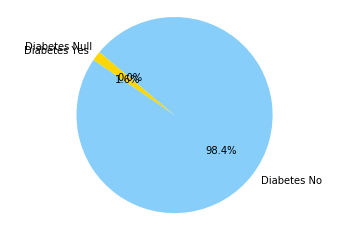

In [100]:
labels = 'Diabetes Yes', 'Diabetes No', 'Diabetes Null' 
sizes = [counterHISTORYyes, counterHISTORYno, counterdiabetesnull]
colors = ['gold', 'lightskyblue', 'green']
explode = (0, 0, 0)


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')
plt.show()

### Fixing IHD Cleaning 2.0

In [101]:
dataset_second_cleaning['Diabetes'].describe()

count     1520
unique       2
top         no
freq      1443
Name: Diabetes, dtype: object

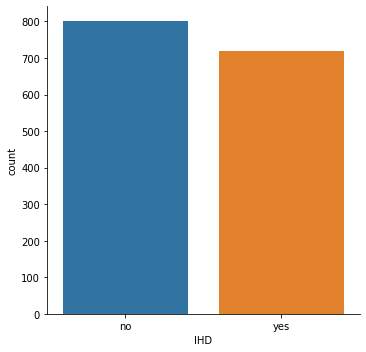

In [102]:
sns.catplot('IHD', data=dataset_second_cleaning, kind="count")

There are no found imputes within the IHD column

### Fixing Hypertension Cleaning 2.0

In [103]:
dataHypertensionNull = dataset_second_cleaning['Hypertension'].isnull()

In [104]:
dataHypertensionNull

0       False
1       False
2       False
3       False
4       False
        ...  
1515    False
1516    False
1517    False
1518    False
1519    False
Name: Hypertension, Length: 1520, dtype: bool

In [105]:
ListHypertension = []
counter = -1
for item in dataHypertensionNull:
    counter = counter + 1
    if item == True:
        ListHypertension.append(counter)

In [106]:
List_Hypertension_Row = []
for index, row in dataset_second_cleaning.iterrows():
    if index in ListHypertension:
        print(index, row)

201 Random          0.38879
Id               240232
Indication          CVA
Diabetes            yes
IHD                  no
Hypertension        NaN
Arrhythmia          yes
History              no
IPSI                 95
Contra               90
label              Risk
Name: 201, dtype: object
590 Random          0.70795
Id               289096
Indication          A-F
Diabetes             no
IHD                  no
Hypertension        NaN
Arrhythmia           no
History              no
IPSI                 78
Contra               30
label            NoRisk
Name: 590, dtype: object
983 Random          0.319215
Id                158024
Indication           TIA
Diabetes              no
IHD                   no
Hypertension         NaN
Arrhythmia            no
History               no
IPSI                  75
Contra                75
label             NoRisk
Name: 983, dtype: object


In [107]:
for index, row in dataset_second_cleaning.iterrows():
    if row['Indication'] == 'CVA' and row['Diabetes'] == 'yes' and row['IHD'] == 'no' and row['Arrhythmia'] == 'yes' and row['History'] == 'no' and row['label'] == 'Risk':
        print(index, row)

33 Random          0.711928
Id                112060
Indication           CVA
Diabetes             yes
IHD                   no
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  95
Contra                75
label               Risk
Name: 33, dtype: object
138 Random          0.811536
Id                121453
Indication           CVA
Diabetes             yes
IHD                   no
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  95
Contra                90
label               Risk
Name: 138, dtype: object
201 Random          0.38879
Id               240232
Indication          CVA
Diabetes            yes
IHD                  no
Hypertension        NaN
Arrhythmia          yes
History              no
IPSI                 95
Contra               90
label              Risk
Name: 201, dtype: object
401 Random          0.292205
Id                104263
Indication           CVA
Diabetes             y

In [108]:
counter = -1
for index, row in dataset_second_cleaning.iterrows():
    counter = counter + 1
    if counter == 201:
        z = dataset_second_cleaning.loc[counter, :]
        z['Hypertension'] = 'yes'
        dataset_second_cleaning.loc[counter, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [109]:
ListHypertension = []
for index, row in dataset_second_cleaning.iterrows():
    if row['Indication'] == 'A-F' and row['Diabetes'] == 'no' and row['IHD'] == 'no' and row['Arrhythmia'] == 'no' and row['History'] == 'no' and row['label'] == 'NoRisk':
        ListHypertension.append(row['Hypertension'])
        print(index, row)

0 Random          0.262646
Id                218242
Indication           A-F
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  78
Contra               20 
label             NoRisk
Name: 0, dtype: object
20 Random          0.299987
Id                250562
Indication           A-F
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  75
Contra               25 
label             NoRisk
Name: 20, dtype: object
27 Random          0.147857
Id                295155
Indication           A-F
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  75
Contra               15 
label             NoRisk
Name: 27, dtype: object
29 Random          0.806727
Id                104062
Indication           A-F
Diabetes          

In [110]:
counterYesHypertension = 0
counterNoHypertension = 0
counterNANhypertension = 0
for item in ListHypertension:
    if item == 'yes':
        counterYesHypertension = counterYesHypertension + 1
    if item == 'no':
        counterNoHypertension = counterNoHypertension + 1
    if item == 'nan':
        counterNANhypertension = counterNANhypertension + 1
print(counterYesHypertension, counterNoHypertension, counterNANhypertension)

51 117 0


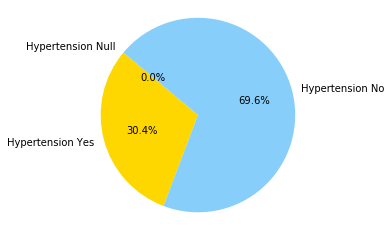

In [111]:
labels = 'Hypertension Yes', 'Hypertension No', 'Hypertension Null' 
sizes = [counterYesHypertension, counterNoHypertension, counterNANhypertension]
colors = ['gold', 'lightskyblue', 'green']
explode = (0, 0, 0)


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')
plt.show()

In [112]:
counter = -1
for index, row in dataset_second_cleaning.iterrows():
    counter = counter + 1
    if counter == 590:
        z = dataset_second_cleaning.loc[counter, :]
        z['Hypertension'] = 'no'
        dataset_second_cleaning.loc[counter, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [113]:
ListHypertension = []
for index, row in dataset_second_cleaning.iterrows():
    if row['Indication'] == 'TIA' and row['Diabetes'] == 'no' and row['IHD'] == 'no' and row['Arrhythmia'] == 'no' and row['History'] == 'no' and row['label'] == 'NoRisk':
        ListHypertension.append(row['Hypertension'])

In [114]:
counterYesHypertension = 0
counterNoHypertension = 0
counterNANhypertension = 0
for item in ListHypertension:
    if item == 'yes':
        counterYesHypertension = counterYesHypertension + 1
    if item == 'no':
        counterNoHypertension = counterNoHypertension + 1
    if item == 'nan':
        counterNANhypertension = counterNANhypertension + 1
print(counterYesHypertension, counterNoHypertension, counterNANhypertension)

76 111 0


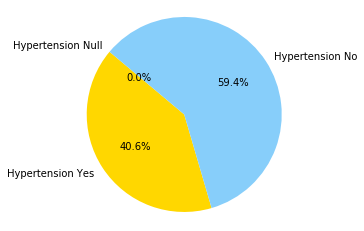

In [115]:
labels = 'Hypertension Yes', 'Hypertension No', 'Hypertension Null' 
sizes = [counterYesHypertension, counterNoHypertension, counterNANhypertension]
colors = ['gold', 'lightskyblue', 'green']
explode = (0, 0, 0)


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')
plt.show()

In [116]:
counter = -1
for index, row in dataset_second_cleaning.iterrows():
    counter = counter + 1
    if counter == 983:
        z = dataset_second_cleaning.loc[counter, :]
        z['Hypertension'] = 'no'
        dataset_second_cleaning.loc[counter, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In order to fix hypertension I found all the imputes and there location. Once the imputes were located I decided to find all the similiar rows to the given impute rows then use the mode to find the most common output for the hypertension value. Once the mode was found then the given impute for hypertension would be filled with the mode from all the similiar rows in the dataframe.

### Fixing Arrhythmia Cleaning 2.0

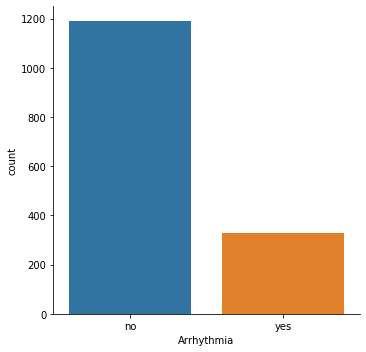

In [117]:
sns.catplot('Arrhythmia', data=dataset_second_cleaning, kind="count")

In [118]:
for index, row in dataset_second_cleaning.iterrows():
    if (row['Arrhythmia'] != 'yes') and (row['Arrhythmia'] != 'no'):
        print(row)

There are no found imputes within the Arrhythmia column

### Fixing History Cleaning 2.0

In [119]:
for index, row in dataset_second_cleaning.iterrows():
    if (row['History'] != 'yes') and (row['History'] != 'no'):
        print(index, row)

337 Random          0.617072
Id                260770
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension          no
Arrhythmia            no
History              NaN
IPSI                  85
Contra                50
label             NoRisk
Name: 337, dtype: object
784 Random          0.243645
Id                196483
Indication           CVA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia           yes
History              NaN
IPSI                  95
Contra               100
label               Risk
Name: 784, dtype: object


In [120]:
ListHistory = []
for index, row in dataset_second_cleaning.iterrows():
    if row['Indication'] == 'CVA' and row['Diabetes'] == 'no' and row['IHD'] == 'yes' and row['Hypertension'] == 'no' and row['Arrhythmia'] == 'no' and row['label'] == 'NoRisk':
        ListHistory.append(row['History'])

In [121]:
counterYesHistory = 0
counterNoHistory = 0
counterNANhistory = 0
for item in ListHistory:
    if item == 'yes':
        counterYesHistory = counterYesHistory + 1
    if item == 'no':
        counterNoHistory = counterNoHistory + 1
    if item == 'nan':
        counterNANhistory = counterNANhistory + 1
print(counterYesHistory, counterNoHistory, counterNANhistory)

2 55 0


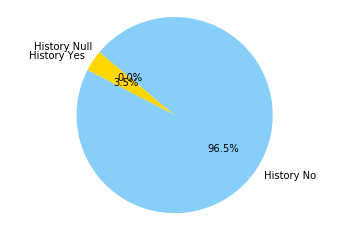

In [122]:
labels = 'History Yes', 'History No', 'History Null' 
sizes = [counterYesHistory, counterNoHistory, counterNANhistory]
colors = ['gold', 'lightskyblue', 'green']
explode = (0, 0, 0)


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')
plt.show()

In [123]:
counter = -1
for index, row in dataset_second_cleaning.iterrows():
    counter = counter + 1
    if counter == 337:
        z = dataset_second_cleaning.loc[counter, :]
        z['History'] = 'no'
        dataset_second_cleaning.loc[counter, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [124]:
dataset_second_cleaning[337:338]

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
337,0.617072,260770,CVA,no,yes,no,no,no,85.0,50,NoRisk


In [125]:
ListHistory = []
for index, row in dataset_second_cleaning.iterrows():
    if row['Indication'] == 'CVA' and row['Diabetes'] == 'no' and row['IHD'] == 'no' and row['Hypertension'] == 'yes' and row['Arrhythmia'] == 'yes' and row['label'] == 'Risk':
        ListHistory.append(row['History'])

In [126]:
counterYesHistory = 0
counterNoHistory = 0
counterNANhistory = 0
for item in ListHistory:
    if item == 'yes':
        counterYesHistory = counterYesHistory + 1
    if item == 'no':
        counterNoHistory = counterNoHistory + 1
    if item == 'nan':
        counterNANhistory = counterNANhistory + 1
print(counterYesHistory, counterNoHistory, counterNANhistory)

0 34 0


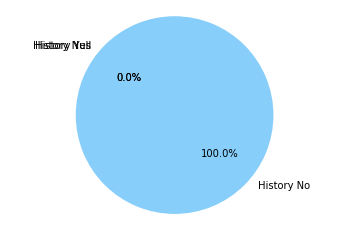

In [127]:
labels = 'History Yes', 'History No', 'History Null' 
sizes = [counterYesHistory, counterNoHistory, counterNANhistory]
colors = ['gold', 'lightskyblue', 'green']
explode = (0, 0, 0)


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')
plt.show()

In [128]:
counter = -1
for index, row in dataset_second_cleaning.iterrows():
    counter = counter + 1
    if counter == 784:
        z = dataset_second_cleaning.loc[counter, :]
        z['History'] = 'no'
        dataset_second_cleaning.loc[counter, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [129]:
dataset_second_cleaning[784:785]

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
784,0.243645,196483,CVA,no,no,yes,yes,no,95.0,100,Risk


### Fixing IPSI Cleaning 2.0

In [130]:
IPSI_null = data['IPSI'].isnull()

In [131]:
counter = -1
IPSI_null_Index = []
for item in IPSI_null:
    counter = counter + 1
    if item == True:
        IPSI_null_Index.append(counter)
IPSI_null_Index

[620, 752, 845, 916]

In [132]:
for index, row in dataset_second_cleaning.iterrows():
    if index in IPSI_null_Index:
        print(index, row)

620 Random          0.57274
Id               227779
Indication          A-F
Diabetes             no
IHD                  no
Hypertension         no
Arrhythmia           no
History              no
IPSI                NaN
Contra              100
label              Risk
Name: 620, dtype: object
752 Random          0.152066
Id                146415
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                 NaN
Contra               100
label               Risk
Name: 752, dtype: object
845 Random          0.920096
Id                104176
Indication           CVA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                 NaN
Contra                20
label             NoRisk
Name: 845, dtype: object
916 Random          0.272243
Id                281679
Indication           A-F
Diabetes            

In [133]:
for index, row in dataset_second_cleaning.iterrows():
    if row['Indication'] == 'A-F' and row['Diabetes'] == 'no' and row['IHD'] == 'no' and row['Hypertension'] == 'no' and row['Arrhythmia'] == 'no' and row['History'] == 'no' and row['Contra'] == '100' and row['label'] == 'Risk':
        print(index, row)

18 Random          0.479682
Id                284552
Indication           A-F
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  75
Contra               100
label               Risk
Name: 18, dtype: object
70 Random          0.691928
Id                234034
Indication           A-F
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  85
Contra               100
label               Risk
Name: 70, dtype: object
94 Random          0.27162
Id               139633
Indication          A-F
Diabetes             no
IHD                  no
Hypertension         no
Arrhythmia           no
History              no
IPSI                 85
Contra              100
label              Risk
Name: 94, dtype: object
178 Random          0.300395
Id                191092
Indication           A-F
Diabetes              no
I

In [134]:
count = -1
for index, row in dataset_second_cleaning.iterrows():
    count = count + 1
    if count == 620:
        z = dataset_second_cleaning.loc[count, :]
        z['IPSI'] = 80
        print(z)
        dataset_second_cleaning.loc[count, :] = z

Random          0.57274
Id               227779
Indication          A-F
Diabetes             no
IHD                  no
Hypertension         no
Arrhythmia           no
History              no
IPSI                 80
Contra              100
label              Risk
Name: 620, dtype: object


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [135]:
for index, row in dataset_second_cleaning.iterrows():
    if row['Indication'] == 'CVA' and row['Diabetes'] == 'no' and row['IHD'] == 'yes' and row['Hypertension'] == 'yes' and row['Arrhythmia'] == 'yes' and row['History'] == 'no' and row['Contra'] == '100' and row['label'] == 'Risk':
        print(index, row['IPSI'])

15 90.0
104 90.0
161 90.0
182 90.0
230 90.0
241 85.0
257 90.0
268 90.0
271 90.0
314 70.0
447 90.0
461 70.0
505 90.0
517 90.0
547 90.0
567 90.0
582 70.0
608 70.0
731 90.0
752 nan
754 85.0
773 90.0
789 90.0
832 90.0
870 70.0
892 90.0
1072 70.0
1089 85.0
1149 85.0
1158 90.0
1227 90.0
1309 90.0
1484 90.0


In [136]:
count = -1
for index, row in dataset_second_cleaning.iterrows():
    count = count + 1
    if count == 752:
        z = dataset_second_cleaning.loc[count, :]
        z['IPSI'] = 85
        print(z)
        dataset_second_cleaning.loc[count, :] = z

Random          0.152066
Id                146415
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  85
Contra               100
label               Risk
Name: 752, dtype: object


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [137]:
for index, row in dataset_second_cleaning.iterrows():
    if row['Indication'] == 'CVA' and row['Diabetes'] == 'no' and row['IHD'] == 'no' and row['Hypertension'] == 'no' and row['Arrhythmia'] == 'no' and row['History'] == 'no' and row['label'] == 'NoRisk':
        print(index, row['IPSI'])

4 70.0
7 75.0
23 68.0
30 99.0
48 75.0
82 75.0
83 75.0
87 70.0
102 80.0
128 75.0
143 99.0
181 70.0
190 80.0
192 95.0
212 95.0
213 68.0
217 75.0
223 68.0
226 70.0
245 68.0
253 95.0
254 60.0
263 70.0
285 68.0
291 95.0
297 68.0
309 70.0
311 90.0
334 75.0
343 90.0
351 50.0
355 75.0
356 75.0
357 95.0
389 70.0
392 50.0
404 70.0
418 50.0
427 60.0
467 70.0
469 75.0
477 75.0
492 68.0
499 60.0
537 68.0
541 75.0
543 90.0
546 75.0
575 75.0
576 95.0
606 70.0
614 68.0
627 73.0
629 50.0
641 70.0
643 75.0
648 70.0
655 80.0
659 70.0
670 75.0
686 68.0
689 75.0
703 70.0
704 90.0
714 75.0
736 75.0
738 99.0
741 68.0
771 75.0
783 95.0
816 75.0
845 nan
899 70.0
903 68.0
904 75.0
920 75.0
932 99.0
935 75.0
936 75.0
965 70.0
984 60.0
991 70.0
999 50.0
1000 99.0
1035 75.0
1049 70.0
1061 70.0
1090 70.0
1109 70.0
1140 70.0
1173 70.0
1179 95.0
1217 68.0
1233 70.0
1246 70.0
1261 68.0
1281 70.0
1291 99.0
1304 68.0
1306 70.0
1335 68.0
1345 75.0
1354 75.0
1357 68.0
1368 99.0
1386 75.0
1435 75.0
1446 70.0
1450 70.0
1459

In [138]:
count = -1
for index, row in dataset_second_cleaning.iterrows():
    count = count + 1
    if count == 845:
        z = dataset_second_cleaning.loc[count, :]
        print(z)
        z['IPSI'] = 69
        dataset_second_cleaning.loc[count, :] = z

Random          0.920096
Id                104176
Indication           CVA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                 NaN
Contra                20
label             NoRisk
Name: 845, dtype: object


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [139]:
for index, row in dataset_second_cleaning.iterrows():
    if row['Indication'] == 'A-F' and row['Diabetes'] == 'no' and row['IHD'] == 'no' and row['Hypertension'] == 'no' and row['Arrhythmia'] == 'no' and row['History'] == 'no' and row['label'] == 'NoRisk':
        print(index, row['IPSI'])

29 78.0
40 70.0
63 75.0
66 70.0
77 74.0
78 78.0
89 95.0
95 70.0
115 80.0
116 78.0
123 75.0
139 80.0
148 90.0
165 67.0
168 70.0
174 95.0
183 75.0
189 70.0
204 75.0
210 80.0
248 82.0
255 74.0
256 70.0
288 75.0
290 75.0
298 67.0
346 70.0
360 80.0
380 75.0
391 70.0
398 70.0
421 75.0
437 80.0
451 90.0
458 95.0
491 80.0
496 70.0
502 95.0
518 80.0
519 82.0
522 75.0
531 90.0
556 75.0
557 75.0
583 70.0
587 78.0
588 95.0
590 78.0
622 82.0
623 95.0
631 90.0
636 90.0
691 70.0
695 75.0
698 80.0
701 74.0
719 70.0
726 78.0
776 90.0
779 75.0
798 70.0
801 80.0
813 90.0
827 80.0
838 95.0
858 75.0
860 80.0
898 70.0
914 80.0
916 nan
933 90.0
939 70.0
951 95.0
953 85.0
978 85.0
998 90.0
1015 90.0
1022 75.0
1026 70.0
1030 90.0
1033 75.0
1038 80.0
1042 78.0
1095 78.0
1142 75.0
1144 81.0
1147 70.0
1164 74.0
1169 70.0
1171 75.0
1186 78.0
1187 70.0
1192 82.0
1210 80.0
1237 70.0
1238 95.0
1242 95.0
1253 80.0
1260 70.0
1273 75.0
1302 90.0
1313 78.0
1319 70.0
1324 70.0
1325 78.0
1327 90.0
1361 75.0
1374 80.0
1381 

In [140]:
count = -1
for index, row in dataset_second_cleaning.iterrows():
    count = count + 1
    if count == 916:
        z = dataset_second_cleaning.loc[count, :]
        z['IPSI'] = 79
        dataset_second_cleaning.loc[count, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Fixing Contra Cleaning 2.0

In [141]:
for index, row in dataset_second_cleaning.iterrows():
    if row['Contra'].isspace():
        print(index, row)

453 Random          0.518558
Id                254469
Indication           ASx
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra                  
label             NoRisk
Name: 453, dtype: object


In [142]:
for index, row in dataset_second_cleaning.iterrows():
    if row['Indication'] == 'ASx' and row['Diabetes'] == 'no' and row['IHD'] == 'no' and row['Hypertension'] =='yes' and row['Arrhythmia'] == 'no' and row['History'] == 'no' and row['IPSI'] == 70 and row['label'] == 'NoRisk':
        print(index, row)

60 Random          0.0885892
Id                 232028
Indication            ASx
Diabetes               no
IHD                    no
Hypertension          yes
Arrhythmia             no
History                no
IPSI                   70
Contra                60 
label              NoRisk
Name: 60, dtype: object
453 Random          0.518558
Id                254469
Indication           ASx
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra                  
label             NoRisk
Name: 453, dtype: object
580 Random          0.580921
Id                294555
Indication           ASx
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra               60 
label             NoRisk
Name: 580, dtype: object
605 Random          0.196472
Id                173263
Indication           ASx


In [143]:
counter = -1
for index, row in dataset_second_cleaning.iterrows():
    counter = counter + 1
    if counter == 453:
        z = dataset_second_cleaning.loc[counter, :]
        z['Contra'] = '60'
        print(z)
        dataset_second_cleaning.loc[counter, :] = z

Random          0.518558
Id                254469
Indication           ASx
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra                60
label             NoRisk
Name: 453, dtype: object


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [144]:
dataset_second_cleaning['Contra'] = pd.to_numeric(dataset_second_cleaning['Contra'])

### Fixing Label Cleaning 2.0

In [145]:
dataset_second_cleaning['label'].describe()

count       1517
unique         3
top       NoRisk
freq        1008
Name: label, dtype: object

In [146]:
for index, row in dataset_second_cleaning.iterrows():
    if (row['label'] != 'Risk') and (row['label'] != 'NoRisk'):
        print(index, row)

475 Random          0.374065
Id                173791
Indication           ASx
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra                55
label            Unknown
Name: 475, dtype: object
523 Random          0.666029
Id                283846
Indication           CVA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  95
Contra               100
label            Unknown
Name: 523, dtype: object
812 Random          0.844584
Id                190671
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  76
Contra                50
label                NaN
Name: 812, dtype: object
974 Random          0.923418
Id                165432
Indication           CVA
Diabetes 

In [147]:
label_List = []
for index, row in dataset_second_cleaning.iterrows():
    if row['Indication'] == 'CVA' and row['Diabetes'] == 'no' and row['IHD'] == 'no' and row['Hypertension'] == 'yes' and row['Arrhythmia'] == 'yes' and row['History'] == 'no':
        if row['label'] == 'Risk' or row['label'] == 'NoRisk':
            label_List.append(row['label'])
label_List

['Risk',
 'Risk',
 'Risk',
 'Risk',
 'NoRisk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'NoRisk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk']

In [148]:
countRisk = 0
countNoRisk = 0
for item in label_List:
    if item == 'Risk':
        countRisk = countRisk + 1
    if item == 'NoRisk':
        countNoRisk = countNoRisk + 1
print(countRisk, countNoRisk)

35 2


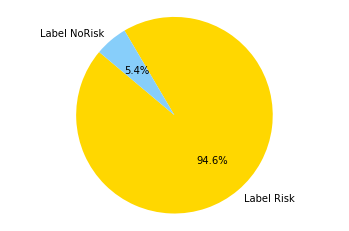

In [149]:
labels = 'Label Risk', 'Label NoRisk' 
sizes = [countRisk, countNoRisk]
colors = ['gold', 'lightskyblue']
explode = (0, 0)


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')
plt.show()

In [150]:
counter = -1
for index, row in dataset_second_cleaning.iterrows():
    counter = counter + 1
    if counter == 523:
        z = dataset_second_cleaning.loc[counter, :]
        z['label'] = 'Risk'
        dataset_second_cleaning.loc[counter, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [151]:
label_List = []
for index, row in dataset_second_cleaning.iterrows():
    if row['Indication'] == 'CVA' and row['Diabetes'] == 'no' and row['IHD'] == 'yes' and row['Hypertension'] == 'yes' and row['Arrhythmia'] == 'no' and row['History'] == 'no':
        if row['label'] == 'Risk' or row['label'] == 'NoRisk':
            label_List.append(row['label'])
label_List

['NoRisk',
 'Risk',
 'NoRisk',
 'Risk',
 'NoRisk',
 'NoRisk',
 'NoRisk',
 'NoRisk',
 'NoRisk',
 'Risk',
 'NoRisk',
 'NoRisk',
 'Risk',
 'Risk',
 'NoRisk',
 'NoRisk',
 'NoRisk',
 'NoRisk',
 'NoRisk',
 'NoRisk',
 'NoRisk',
 'Risk',
 'NoRisk',
 'Risk',
 'Risk',
 'NoRisk',
 'Risk',
 'NoRisk',
 'NoRisk',
 'NoRisk',
 'NoRisk',
 'NoRisk',
 'NoRisk',
 'NoRisk',
 'NoRisk',
 'NoRisk',
 'NoRisk',
 'NoRisk',
 'Risk',
 'NoRisk',
 'NoRisk',
 'NoRisk',
 'Risk',
 'Risk',
 'NoRisk',
 'NoRisk',
 'NoRisk',
 'Risk',
 'NoRisk',
 'NoRisk',
 'NoRisk']

In [152]:
countRisk = 0
countNoRisk = 0
for item in label_List:
    if item == 'Risk':
        countRisk = countRisk + 1
    if item == 'NoRisk':
        countNoRisk = countNoRisk + 1
print(countRisk, countNoRisk)

13 38


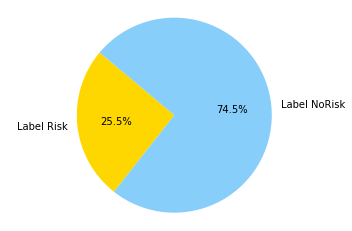

In [153]:
labels = 'Label Risk', 'Label NoRisk' 
sizes = [countRisk, countNoRisk]
colors = ['gold', 'lightskyblue']
explode = (0, 0)


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')
plt.show()

In [154]:
counter = -1
for index, row in dataset_second_cleaning.iterrows():
    counter = counter + 1
    if counter == 812:
        z = dataset_second_cleaning.loc[counter, :]
        z['label'] = 'NoRisk'
        dataset_second_cleaning.loc[counter, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [155]:
label_List = []
for index, row in dataset_second_cleaning.iterrows():
    if row['Indication'] == 'CVA' and row['Diabetes'] == 'no' and row['IHD'] == 'yes' and row['Hypertension'] == 'yes' and row['Arrhythmia'] == 'yes' and row['History'] == 'no':
        if row['label'] == 'Risk' or row['label'] == 'NoRisk':
            label_List.append(row['label'])
label_List

['Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'NoRisk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'NoRisk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'Risk',
 'NoRisk',
 'Risk',
 'Risk',
 'Risk']

In [156]:
countRisk = 0
countNoRisk = 0
for item in label_List:
    if item == 'Risk':
        countRisk = countRisk + 1
    if item == 'NoRisk':
        countNoRisk = countNoRisk + 1
print(countRisk, countNoRisk)

68 3


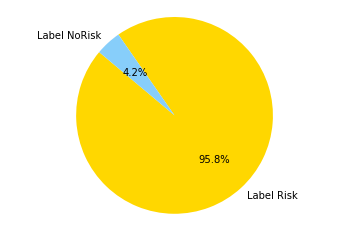

In [157]:
labels = 'Label Risk', 'Label NoRisk' 
sizes = [countRisk, countNoRisk]
colors = ['gold', 'lightskyblue']
explode = (0, 0)


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')
plt.show()

In [158]:
counter = -1
for index, row in dataset_second_cleaning.iterrows():
    counter = counter + 1
    if counter == 974:
        z = dataset_second_cleaning.loc[counter, :]
        z['label'] = 'Risk'
        dataset_second_cleaning.loc[counter, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [159]:
label_List = []
for index, row in dataset_second_cleaning.iterrows():
    if row['Indication'] == 'TIA' and row['Diabetes'] == 'yes' and row['IHD'] == 'no' and row['Hypertension'] == 'no' and row['Arrhythmia'] == 'no' and row['History'] == 'yes':
        if row['label'] == 'Risk' or row['label'] == 'NoRisk':
            label_List.append(row['label'])
label_List

['Risk']

In [160]:
countRisk = 0
countNoRisk = 0
for item in label_List:
    if item == 'Risk':
        countRisk = countRisk + 1
    if item == 'NoRisk':
        countNoRisk = countNoRisk + 1
print(countRisk, countNoRisk)

1 0


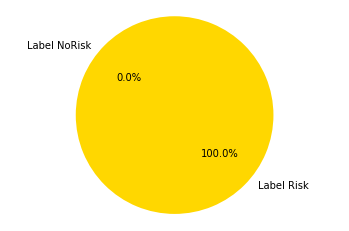

In [161]:
labels = 'Label Risk', 'Label NoRisk' 
sizes = [countRisk, countNoRisk]
colors = ['gold', 'lightskyblue']
explode = (0, 0)


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')
plt.show()

In [162]:
counter = -1
for index, row in dataset_second_cleaning.iterrows():
    counter = counter + 1
    if counter == 1418:
        z = dataset_second_cleaning.loc[counter, :]
        z['label'] = 'Risk'
        dataset_second_cleaning.loc[counter, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [163]:
label_List = []
for index, row in dataset_second_cleaning.iterrows():
    if row['Indication'] == 'ASx' and row['Diabetes'] == 'no' and row['IHD'] == 'yes' and row['Hypertension'] == 'yes' and row['Arrhythmia'] == 'no' and row['History'] == 'no':
        if row['label'] == 'Risk' or row['label'] == 'NoRisk':
            label_List.append(row['label'])
label_List

['NoRisk',
 'Risk',
 'NoRisk',
 'Risk',
 'Risk',
 'NoRisk',
 'NoRisk',
 'Risk',
 'Risk',
 'NoRisk',
 'Risk',
 'NoRisk',
 'NoRisk',
 'NoRisk',
 'Risk',
 'Risk']

In [164]:
countRisk = 0
countNoRisk = 0
for item in label_List:
    if item == 'Risk':
        countRisk = countRisk + 1
    if item == 'NoRisk':
        countNoRisk = countNoRisk + 1
print(countRisk, countNoRisk)

8 8


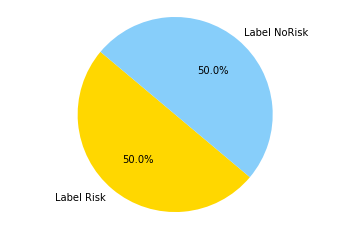

In [165]:
labels = 'Label Risk', 'Label NoRisk' 
sizes = [countRisk, countNoRisk]
colors = ['gold', 'lightskyblue']
explode = (0, 0)


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')
plt.show()

In [166]:
counterRiskLabel = 0
counterNoRiskLabel = 0

for index, row in dataset_second_cleaning.iterrows():
    if row['label'] == 'Risk':
        counterRiskLabel = counterRiskLabel + 1
    if row['label'] == 'NoRisk':
        counterNoRiskLabel = counterNoRiskLabel + 1
print(counterRiskLabel, counterNoRiskLabel)

510 1009


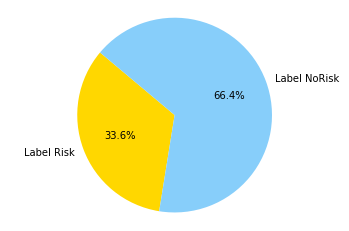

In [167]:
labels = 'Label Risk', 'Label NoRisk' 
sizes = [counterRiskLabel, counterNoRiskLabel]
colors = ['gold', 'lightskyblue']
explode = (0, 0)


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')
plt.show()

In [168]:
counter = -1
for index, row in dataset_second_cleaning.iterrows():
    counter = counter + 1
    if counter == 475:
        z = dataset_second_cleaning.loc[counter, :]
        z['label'] = 'NoRisk'
        dataset_second_cleaning.loc[counter, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [169]:
dataset_second_cleaning

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.262646,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.084541,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.233586,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.419652,93406,A-F,no,yes,no,no,no,76.0,60,NoRisk
1516,0.253504,121814,A-F,no,no,yes,yes,no,90.0,75,Risk
1517,0.620373,101754,TIA,no,no,yes,no,no,75.0,20,NoRisk
1518,0.639342,263836,A-F,no,yes,no,no,no,70.0,45,NoRisk


### Preparing dataset_second_cleaning For Modelling

In [170]:
for index, row in dataset_second_cleaning.iterrows():
    if row['Indication'] == 'A-F':
        z = dataset_second_cleaning.loc[index, :]
        z['Indication'] = 1
        dataset_second_cleaning.loc[index, :] = z
    elif row['Indication'] == 'TIA':
        z = dataset_second_cleaning.loc[index, :]
        z['Indication'] = 2
        dataset_second_cleaning.loc[index, :] = z
    elif row['Indication'] == 'ASx':
        z = dataset_second_cleaning.loc[index, :]
        z['Indication'] = 3
        dataset_second_cleaning.loc[index, :] = z
    elif row['Indication'] == 'CVA':
        z = dataset_second_cleaning.loc[index, :]
        z['Indication'] = 4
        dataset_second_cleaning.loc[index, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-

In [171]:
for index, row in dataset_second_cleaning.iterrows():
    if row['Diabetes'] == 'yes':
        z = dataset_second_cleaning.loc[index, :]
        z['Diabetes'] = 1
        dataset_second_cleaning.loc[index, :] = z
    elif row['Diabetes'] == 'no':
        z = dataset_second_cleaning.loc[index, :]
        z['Diabetes'] = 0
        dataset_second_cleaning.loc[index, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [172]:
for index, row in dataset_second_cleaning.iterrows():
    if row['IHD'] == 'yes':
        z = dataset_second_cleaning.loc[index, :]
        z['IHD'] = 1
        dataset_second_cleaning.loc[index, :] = z
    elif row['IHD'] == 'no':
        z = dataset_second_cleaning.loc[index, :]
        z['IHD'] = 0
        dataset_second_cleaning.loc[index, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [173]:
for index, row in dataset_second_cleaning.iterrows():
    if row['Hypertension'] == 'yes':
        z = dataset_second_cleaning.loc[index, :]
        z['Hypertension'] = 1
        dataset_second_cleaning.loc[index, :] = z
    elif row['Hypertension'] == 'no':
        z = dataset_second_cleaning.loc[index, :]
        z['Hypertension'] = 0
        dataset_second_cleaning.loc[index, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [174]:
for index, row in dataset_second_cleaning.iterrows():
    if row['Arrhythmia'] == 'yes':
        z = dataset_second_cleaning.loc[index, :]
        z['Arrhythmia'] = 1
        dataset_second_cleaning.loc[index, :] = z
    elif row['Arrhythmia'] == 'no':
        z = dataset_second_cleaning.loc[index, :]
        z['Arrhythmia'] = 0
        dataset_second_cleaning.loc[index, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [175]:
for index, row in dataset_second_cleaning.iterrows():
    if row['History'] == 'yes':
        z = dataset_second_cleaning.loc[index, :]
        z['History'] = 1
        dataset_second_cleaning.loc[index, :] = z
    elif row['History'] == 'no':
        z = dataset_second_cleaning.loc[index, :]
        z['History'] = 0
        dataset_second_cleaning.loc[index, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [176]:
for index, row in dataset_second_cleaning.iterrows():
    if row['label'] == 'Risk':
        z = dataset_second_cleaning.loc[index, :]
        z['label'] = 1
        dataset_second_cleaning.loc[index, :] = z
    elif row['label'] == 'NoRisk':
        z = dataset_second_cleaning.loc[index, :]
        z['label'] = 0
        dataset_second_cleaning.loc[index, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [177]:
dataset_second_cleaning = dataset_second_cleaning.drop(['Random'], axis=1)
dataset_second_cleaning = dataset_second_cleaning.drop(['Id'], axis=1)

# Cleaning 3.0 Using Decision Trees

In [178]:
DecisionTree_one = Simple_Cleaning_df.copy()
DecisionTree_one = DecisionTree_one.dropna()
DecisionTree_one

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,TIA,no,no,no,no,no,70.0,60,NoRisk
2,A-F,no,yes,yes,no,no,95.0,40,Risk
3,TIA,no,no,yes,no,no,90.0,85,Risk
4,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...
1466,A-F,no,yes,no,no,no,76.0,60,NoRisk
1467,A-F,no,no,yes,yes,no,90.0,75,Risk
1468,TIA,no,no,yes,no,no,75.0,20,NoRisk
1469,A-F,no,yes,no,no,no,70.0,45,NoRisk


In order to properly prepare the 3rd dataframe correctly for creating a decision tree model you first have to remove an imputes from the dataframe which is why the 3rd dataframe is a copy of the first dataframe as all the imputes have been dropped from the dataframe meaning it doesn't contain any unknown/null values in the dataframe which could reduce significantly the accuracy of the dataframe.

### Converting Indication into Binary

In [179]:
for index, row in DecisionTree_one.iterrows():
    if row['Indication'] == 'A-F':
        z = DecisionTree_one.loc[index, :]
        z['Indication'] = 1
        DecisionTree_one.loc[index, :] = z
    elif row['Indication'] == 'TIA':
        z = DecisionTree_one.loc[index, :]
        z['Indication'] = 2
        DecisionTree_one.loc[index, :] = z
    elif row['Indication'] == 'ASx':
        z = DecisionTree_one.loc[index, :]
        z['Indication'] = 3
        DecisionTree_one.loc[index, :] = z
    elif row['Indication'] == 'CVA':
        z = DecisionTree_one.loc[index, :]
        z['Indication'] = 4
        DecisionTree_one.loc[index, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-

### Converting Diabetes into Binary 

In [180]:
for index, row in DecisionTree_one.iterrows():
    if row['Diabetes'] == 'yes':
        z = DecisionTree_one.loc[index, :]
        z['Diabetes'] = 1
        DecisionTree_one.loc[index, :] = z
    elif row['Diabetes'] == 'no':
        z = DecisionTree_one.loc[index, :]
        z['Diabetes'] = 0
        DecisionTree_one.loc[index, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Converting IHD into Binary

In [181]:
for index, row in DecisionTree_one.iterrows():
    if row['IHD'] == 'yes':
        z = DecisionTree_one.loc[index, :]
        z['IHD'] = 1
        DecisionTree_one.loc[index, :] = z
    elif row['IHD'] == 'no':
        z = DecisionTree_one.loc[index, :]
        z['IHD'] = 0
        DecisionTree_one.loc[index, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Converting Hypertension into Binary 

In [182]:
for index, row in DecisionTree_one.iterrows():
    if row['Hypertension'] == 'yes':
        z = DecisionTree_one.loc[index, :]
        z['Hypertension'] = 1
        DecisionTree_one.loc[index, :] = z
    elif row['Hypertension'] == 'no':
        z = DecisionTree_one.loc[index, :]
        z['Hypertension'] = 0
        DecisionTree_one.loc[index, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Converting Arrhythmia into Binary 

In [183]:
for index, row in DecisionTree_one.iterrows():
    if row['Arrhythmia'] == 'yes':
        z = DecisionTree_one.loc[index, :]
        z['Arrhythmia'] = 1
        DecisionTree_one.loc[index, :] = z
    elif row['Arrhythmia'] == 'no':
        z = DecisionTree_one.loc[index, :]
        z['Arrhythmia'] = 0
        DecisionTree_one.loc[index, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Converting History into Binary

In [184]:
for index, row in DecisionTree_one.iterrows():
    if row['History'] == 'yes':
        z = DecisionTree_one.loc[index, :]
        z['History'] = 1
        DecisionTree_one.loc[index, :] = z
    elif row['History'] == 'no':
        z = DecisionTree_one.loc[index, :]
        z['History'] = 0
        DecisionTree_one.loc[index, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Converting Label into Binary

In [185]:
for index, row in DecisionTree_one.iterrows():
    if row['label'] == 'Risk':
        z = DecisionTree_one.loc[index, :]
        z['label'] = 1
        DecisionTree_one.loc[index, :] = z
    elif row['label'] == 'NoRisk':
        z = DecisionTree_one.loc[index, :]
        z['label'] = 0
        DecisionTree_one.loc[index, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [186]:
Simple_Cleaning_df = DecisionTree_one.copy()

### Creating The Decision Tree

In [187]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import sklearn

In [188]:
DecisionTree_one = sklearn.utils.shuffle(DecisionTree_one) # always shuffle your data to avoid any biases 
X = DecisionTree_one.drop('label', axis=1).values # Features
y = DecisionTree_one['label'].values

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [190]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = 'gini', random_state = 100)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [191]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9909297052154195


In [192]:
model_predictions  = []
actual_predictions = []
for P, j in zip(X_test, y_test):
    print(f"Model: {clf.predict([P])[0]}, Actual: {j}")
    model_predictions.append(clf.predict([P])[0])
    actual_predictions.append(y_pred)

Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0


In [193]:
X = [[2, 1, 0, 0, 0, 1, 90, 50]]
clf.predict(X)

array([0], dtype=int64)

### Fixing Indication Using Decision Trees

In [194]:
DecisionTree_two = data.copy()

In [195]:
DecisionTree_two = DecisionTree_two.replace(to_replace = 'Asx', value = "ASx")

In [196]:
dataDecisionIndication = DecisionTree_two['Indication'].isnull()

In [197]:
counter = -1
for item in dataDecisionIndication:
    counter = counter + 1
    if item == True:
        print(counter)

442
822
1007


In [198]:
 for index, row in DecisionTree_two.iterrows():
    if (index == 442) or (index == 822) or (index == 1007):
        print(index, row)

442 Random          0.648122
Id                261060
Indication           NaN
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra                40
label             NoRisk
Name: 442, dtype: object
822 Random          0.21176
Id               205845
Indication          NaN
Diabetes             no
IHD                 yes
Hypertension         no
Arrhythmia           no
History              no
IPSI                 80
Contra              100
label              Risk
Name: 822, dtype: object
1007 Random          0.761219
Id                256076
Indication           NaN
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia           yes
History              yes
IPSI                  99
Contra               100
label               Risk
Name: 1007, dtype: object


In [199]:
for index, row in DecisionTree_two.iterrows():
    if index == 442:
        z = DecisionTree_two.loc[index, :]
        z['Indication'] = 'A-F'
        DecisionTree_two.loc[index, :] = z
    if index == 822:
        z = DecisionTree_two.loc[index, :]
        z['Indication'] = 'A-F'
        DecisionTree_two.loc[index, :] = z
    if index == 1007:
        z = DecisionTree_two.loc[index, :]
        z['Indication'] = 'CVA'
        DecisionTree_two.loc[index, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


### Fixing Diabetes Using Decision Trees

In [200]:
DiabetesNull = DecisionTree_two['Diabetes'].isnull()

In [201]:
counter = -1
for item in DiabetesNull:
    counter = counter + 1
    if item == True:
        print(counter)

447
514


In [202]:
for index, row in DecisionTree_two.iterrows():
    if (index == 447) or (index == 514):
        print(index, row)

447 Random          0.681744
Id                224257
Indication           CVA
Diabetes             NaN
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  90
Contra               100
label               Risk
Name: 447, dtype: object
514 Random          0.39213
Id               210861
Indication          A-F
Diabetes            NaN
IHD                  no
Hypertension        yes
Arrhythmia           no
History              no
IPSI                 80
Contra               40
label            NoRisk
Name: 514, dtype: object


In [203]:
for index, row in DecisionTree_two.iterrows():
    if index == 447:
        z = DecisionTree_two.loc[index, :]
        z['Diabetes'] = 'no'
        DecisionTree_two.loc[index, :] = z
    if index == 514:
        z = DecisionTree_two.loc[index, :]
        z['Diabetes'] = 'no'
        DecisionTree_two.loc[index, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Fixing Hypertension Using Decision Trees

In [204]:
dataDecisionHYP = DecisionTree_two['Hypertension'].isnull()

In [205]:
counter = -1
for item in dataDecisionHYP:
    counter = counter + 1
    if item == True:
        print(counter)

201
590
983


In [206]:
for index, row in DecisionTree_two.iterrows():
    if (index == 201) or (index == 590) or (index == 983):
        print(index, row)

201 Random          0.38879
Id               240232
Indication          CVA
Diabetes            yes
IHD                  no
Hypertension        NaN
Arrhythmia          yes
History              no
IPSI                 95
Contra               90
label              Risk
Name: 201, dtype: object
590 Random          0.70795
Id               289096
Indication          A-F
Diabetes             no
IHD                  no
Hypertension        NaN
Arrhythmia           no
History              no
IPSI                 78
Contra               30
label            NoRisk
Name: 590, dtype: object
983 Random          0.319215
Id                158024
Indication           TIA
Diabetes              no
IHD                   no
Hypertension         NaN
Arrhythmia            no
History               no
IPSI                  75
Contra                75
label             NoRisk
Name: 983, dtype: object


In [207]:
for index, row in DecisionTree_two.iterrows():
    if index == 201:
        z = DecisionTree_two.loc[index, :]
        z['Hypertension'] = 'yes'
        DecisionTree_two.loc[index, :] = z
    if index == 590:
        z = DecisionTree_two.loc[index, :]
        z['Hypertension'] = 'no'
        DecisionTree_two.loc[index, :] = z
    if index == 983:
        z = DecisionTree_two.loc[index, :]
        z['Hypertension'] = 'no'
        DecisionTree_two.loc[index, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


### Fixing History Using Decision Trees

In [208]:
dataDecisionHis = DecisionTree_two['History'].isnull()

In [209]:
counter = -1
for item in dataDecisionHis:
    counter = counter + 1
    if item == True:
        print(counter)

337
784


In [210]:
for index, row in DecisionTree_two.iterrows():
    if (index == 337) or (index == 784):
        print(index, row)

337 Random          0.617072
Id                260770
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension          no
Arrhythmia            no
History              NaN
IPSI                  85
Contra                50
label             NoRisk
Name: 337, dtype: object
784 Random          0.243645
Id                196483
Indication           CVA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia           yes
History              NaN
IPSI                  95
Contra               100
label               Risk
Name: 784, dtype: object


In [211]:
for index, row in DecisionTree_two.iterrows():
    if index == 337:
        z = DecisionTree_two.loc[index, :]
        z['History'] = 'no'
        DecisionTree_two.loc[index, :] = z
    if index == 784:
        z = DecisionTree_two.loc[index, :]
        z['History'] = 'no'
        DecisionTree_two.loc[index, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Fixing IPSI Using Decision Trees

In [212]:
dataDecisionIPSI = DecisionTree_two['IPSI'].isnull()

In [213]:
counter = -1
for item in dataDecisionIPSI:
    counter = counter + 1
    if item == True:
        print(counter)

620
752
845
916


In [214]:
for index, row in DecisionTree_two.iterrows():
    if (index == 620) or (index == 752) or (index == 845) or (index == 916):
        print(index, row)

620 Random          0.283872
Id                227779
Indication           A-F
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                 NaN
Contra               100
label               Risk
Name: 620, dtype: object
752 Random          0.243518
Id                146415
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                 NaN
Contra               100
label               Risk
Name: 752, dtype: object
845 Random          0.920096
Id                104176
Indication           CVA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                 NaN
Contra                20
label             NoRisk
Name: 845, dtype: object
916 Random          0.00450114
Id                  281679
Indication             A-F
Dia

In [215]:
for index, row in DecisionTree_two.iterrows():
    if index == 620:
        z = DecisionTree_two.loc[index, :]
        z['IPSI'] = 80
        DecisionTree_two.loc[index, :] = z
    if index == 752:
        z = DecisionTree_two.loc[index, :]
        z['IPSI'] = 90
        DecisionTree_two.loc[index, :] = z
    if index == 845:
        z = DecisionTree_two.loc[index, :]
        z['IPSI'] = 60
        DecisionTree_two.loc[index, :] = z
    if index == 916:
        z = DecisionTree_two.loc[index, :]
        z['IPSI'] = 90
        DecisionTree_two.loc[index, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-pack

### Fixing Contra Using Decision Trees

In [216]:
for index, row in DecisionTree_two.iterrows():
    if row['Contra'].isspace() == True:
        print(index, row)

453 Random          0.518558
Id                254469
Indication           ASx
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra                  
label             NoRisk
Name: 453, dtype: object


In [217]:
for index, row in DecisionTree_two.iterrows():
    if index == 453:
        z = DecisionTree_two.loc[index, :]
        z['Contra'] = 60
        DecisionTree_two.loc[index, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [218]:
DecisionTree_two['Contra'] = pd.to_numeric(DecisionTree_two['Contra'])

### Fixing Label Using Decision Trees

In [219]:
for index, row in DecisionTree_two.iterrows():
    if (row['label'] != 'Risk') and (row['label'] != 'NoRisk'):
        print(index, row)

475 Random          0.298074
Id                173791
Indication           ASx
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra                55
label            Unknown
Name: 475, dtype: object
523 Random          0.46017
Id               283846
Indication          CVA
Diabetes             no
IHD                  no
Hypertension        yes
Arrhythmia          yes
History              no
IPSI                 95
Contra              100
label           Unknown
Name: 523, dtype: object
812 Random          0.756938
Id                190671
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  76
Contra                50
label                NaN
Name: 812, dtype: object
974 Random          0.923418
Id                165432
Indication           CVA
Diabetes            

In [220]:
for index, row in DecisionTree_two.iterrows():
    if index == 475:
        z = DecisionTree_two.loc[index, :]
        z['label'] = 'Risk'
        DecisionTree_two.loc[index, :] = z
    if index == 523:
        z = DecisionTree_two.loc[index, :]
        z['label'] = 'NoRisk'
        DecisionTree_two.loc[index, :] = z
    if index == 812:
        z = DecisionTree_two.loc[index, :]
        z['label'] = 'NoRisk'
        DecisionTree_two.loc[index, :] = z
    if index == 974:
        z = DecisionTree_two.loc[index, :]
        z['label'] = 'Risk'
        DecisionTree_two.loc[index, :] = z
    if index == 1418:
        z = DecisionTree_two.loc[index, :]
        z['label'] = 'Risk'
        DecisionTree_two.loc[index, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-pack

### Preparing DecisionTree_two For Modelling

In [221]:
for index, row in DecisionTree_two.iterrows():
    if row['Indication'] == 'A-F':
        z = DecisionTree_two.loc[index, :]
        z['Indication'] = 1
        DecisionTree_two.loc[index, :] = z
    elif row['Indication'] == 'TIA':
        z = DecisionTree_two.loc[index, :]
        z['Indication'] = 2
        DecisionTree_two.loc[index, :] = z
    elif row['Indication'] == 'ASx':
        z = DecisionTree_two.loc[index, :]
        z['Indication'] = 3
        DecisionTree_two.loc[index, :] = z
    elif row['Indication'] == 'CVA':
        z = DecisionTree_two.loc[index, :]
        z['Indication'] = 4
        DecisionTree_two.loc[index, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-

In [222]:
for index, row in DecisionTree_two.iterrows():
    if row['Diabetes'] == 'yes':
        z = DecisionTree_two.loc[index, :]
        z['Diabetes'] = 1
        DecisionTree_two.loc[index, :] = z
    elif row['Diabetes'] == 'no':
        z = DecisionTree_two.loc[index, :]
        z['Diabetes'] = 0
        DecisionTree_two.loc[index, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [223]:
for index, row in DecisionTree_two.iterrows():
    if row['IHD'] == 'yes':
        z = DecisionTree_two.loc[index, :]
        z['IHD'] = 1
        DecisionTree_two.loc[index, :] = z
    elif row['IHD'] == 'no':
        z = DecisionTree_two.loc[index, :]
        z['IHD'] = 0
        DecisionTree_two.loc[index, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [224]:
for index, row in DecisionTree_two.iterrows():
    if row['Hypertension'] == 'yes':
        z = DecisionTree_two.loc[index, :]
        z['Hypertension'] = 1
        DecisionTree_two.loc[index, :] = z
    elif row['Hypertension'] == 'no':
        z = DecisionTree_two.loc[index, :]
        z['Hypertension'] = 0
        DecisionTree_two.loc[index, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [225]:
for index, row in DecisionTree_two.iterrows():
    if row['Arrhythmia'] == 'yes':
        z = DecisionTree_two.loc[index, :]
        z['Arrhythmia'] = 1
        DecisionTree_two.loc[index, :] = z
    elif row['Arrhythmia'] == 'no':
        z = DecisionTree_two.loc[index, :]
        z['Arrhythmia'] = 0
        DecisionTree_two.loc[index, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [226]:
for index, row in DecisionTree_two.iterrows():
    if row['History'] == 'yes':
        z = DecisionTree_two.loc[index, :]
        z['History'] = 1
        DecisionTree_two.loc[index, :] = z
    elif row['History'] == 'no':
        z = DecisionTree_two.loc[index, :]
        z['History'] = 0
        DecisionTree_two.loc[index, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [227]:
for index, row in DecisionTree_two.iterrows():
    if row['label'] == 'Risk':
        z = DecisionTree_two.loc[index, :]
        z['label'] = 1
        DecisionTree_two.loc[index, :] = z
    elif row['label'] == 'NoRisk':
        z = DecisionTree_two.loc[index, :]
        z['label'] = 0
        DecisionTree_two.loc[index, :] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [228]:
DecisionTree_two = DecisionTree_two.drop(['Random'], axis=1)
DecisionTree_two = DecisionTree_two.drop(['Id'], axis=1)

# Modelling 1.0

### Test Split Modelling

In [229]:
Simple_Cleaning_df = sklearn.utils.shuffle(Simple_Cleaning_df)
X = Simple_Cleaning_df.drop("label", axis=1).values
y = Simple_Cleaning_df["label"].values

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

### Multilayered Perceptrons 

In [231]:
from sklearn.neural_network import MLPClassifier
model1 = MLPClassifier(solver='adam', max_iter=50000, hidden_layer_sizes=(10,20,30,40,50,60,70,80,90,100), random_state=1)
model1 = model1.fit(X_train, y_train)
model1score = model1.score(X_test, y_test)
print(model1.score(X_test, y_test))

0.9138321995464853


In [232]:
y_pred = model1.predict(X_test)
model1_metrics = metrics.classification_report(y_test,y_pred)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93       296
           1       0.79      1.00      0.88       145

    accuracy                           0.91       441
   macro avg       0.90      0.94      0.91       441
weighted avg       0.93      0.91      0.92       441



### Creating Confusion Matrix and Sensitivity

In [233]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred)

tp = 0
tn = 0
fp = 0
fn = 0
for item in conusionNum:
    tp = conusionNum[0, 0]
    fp = conusionNum[0, 1]
    fn = conusionNum[1, 0]
    tn = conusionNum[1, 1]
total = tp + fp + fn + tn
print(((tp/total)*100),((fp/total)*100),((fn/total)*100),((tn/total)*100))
tp = tp/total*100
fp = fp/total*100
fn = fn/total*100
tn = tn/total*100

58.50340136054422 8.616780045351474 0.0 32.87981859410431


In [234]:
tp_sensitivity = (tp/(tp+fn)) * 100
tn_sensitivity = (tn/(tn+fp)) * 100
fp_sensitivity = (fp/(fp+tn)) * 100
fn_sensitivity = (fn/(fn+tp)) * 100
print(tp_sensitivity, tn_sensitivity, fp_sensitivity, fn_sensitivity)

100.0 79.23497267759562 20.76502732240437 0.0


### Logistic Regression

In [235]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(max_iter=10000)
model2.fit(X_train, y_train)
model2score = model2.score(X_test, y_test)
print(model2.score(X_test, y_test))

0.9478458049886621


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [236]:
y_pred = model2.predict(X_test)
model2_metrics = metrics.classification_report(y_test,y_pred)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       296
           1       0.96      0.88      0.92       145

    accuracy                           0.95       441
   macro avg       0.95      0.93      0.94       441
weighted avg       0.95      0.95      0.95       441



### Creating a Confusion Matrix and Sensitivity

In [237]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred)

tp1 = 0
tn1 = 0
fp1 = 0
fn1 = 0
for item in conusionNum:
    tp1 = conusionNum[0, 0]
    fp1 = conusionNum[0, 1]
    fn1 = conusionNum[1, 0]
    tn1 = conusionNum[1, 1]
total1 = tp1 + fp1 + fn1 + tn1
print(((tp1/total1)*100),((fp1/total1)*100),((fn1/total1)*100),((tn1/total1)*100))
tp1 = tp1/total1*100
fp1 = fp1/total1*100
fn1 = fn1/total1*100
tn1 = tn1/total1*100

65.75963718820861 1.3605442176870748 3.8548752834467117 29.024943310657598


In [238]:
tp_sensitivity1 = (tp1/(tp1+fn1)) * 100
tn_sensitivity1 = (tn1/(tn1+fp1)) * 100
fp_sensitivity1 = (fp1/(fp1+tn1)) * 100
fn_sensitivity1 = (fn1/(fn1+tp1)) * 100
print(tp_sensitivity1, tn_sensitivity1, fp_sensitivity1, fn_sensitivity1)

94.46254071661238 95.52238805970148 4.477611940298507 5.537459283387622


### KNN

In [239]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=5)
model3.fit(X_train, y_train)
model3score = model3.score(X_test, y_test)
print(model3.score(X_test, y_test))

0.9297052154195011


In [240]:
y_pred = model3.predict(X_test)
model3_metrics = metrics.classification_report(y_test,y_pred)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       296
           1       0.91      0.88      0.89       145

    accuracy                           0.93       441
   macro avg       0.92      0.92      0.92       441
weighted avg       0.93      0.93      0.93       441



### Creating Confusion Matrix and Sensitivity

In [241]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred)

tp2 = 0
tn2 = 0
fp2 = 0
fn2 = 0
for item in conusionNum:
    tp2 = conusionNum[0, 0]
    fp2 = conusionNum[0, 1]
    fn2 = conusionNum[1, 0]
    tn2 = conusionNum[1, 1]
total2 = tp2 + fp2 + fn2 + tn2
print(((tp2/total2)*100),((fp2/total2)*100),((fn2/total2)*100),((tn2/total2)*100))
tp2 = tp2/total2*100
fp2 = fp2/total2*100
fn2 = fn2/total2*100
tn2 = tn2/total2*100

64.17233560090703 2.947845804988662 4.081632653061225 28.798185941043087


In [242]:
tp_sensitivity2 = (tp2/(tp2+fn2)) * 100
tn_sensitivity2 = (tn2/(tn2+fp2)) * 100
fp_sensitivity2 = (fp2/(fp2+tn2)) * 100
fn_sensitivity2 = (fn2/(fn2+tp2)) * 100
print(tp_sensitivity2, tn_sensitivity2, fp_sensitivity2, fn_sensitivity2)

94.01993355481729 90.71428571428571 9.285714285714285 5.980066445182724


# Modelling 2.0

### Test Split Modelling

In [243]:
dataset_second_cleaning = sklearn.utils.shuffle(dataset_second_cleaning)
X = dataset_second_cleaning.drop("label", axis=1).values
y = dataset_second_cleaning["label"].values

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

### MLP

In [245]:
from sklearn.neural_network import MLPClassifier
model4 = MLPClassifier(solver='adam', max_iter=50000, hidden_layer_sizes=(10,20,30,40,50,60,70,80,90,100), random_state=1)
trained_model4 = model4.fit(X_train, y_train)
model4score = model4.score(X_test, y_test)
print(trained_model4.score(X_test, y_test))

0.9649122807017544


In [246]:
y_pred = model4.predict(X_test)
model4_metrics = metrics.classification_report(y_test,y_pred)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       300
           1       0.96      0.94      0.95       156

    accuracy                           0.96       456
   macro avg       0.96      0.96      0.96       456
weighted avg       0.96      0.96      0.96       456



### Creating a Confusion Matrix and Sensitivity

In [247]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred)

tp3 = 0
tn3 = 0
fp3 = 0
fn3 = 0
for item in conusionNum:
    tp3 = conusionNum[0, 0]
    fp3 = conusionNum[0, 1]
    fn3 = conusionNum[1, 0]
    tn3 = conusionNum[1, 1]
total3 = tp3 + fp3 + fn3 + tn3
print(((tp3/total3)*100),((fp3/total3)*100),((fn3/total3)*100),((tn3/total3)*100))
tp3 = tp3/total3*100
fp3 = fp3/total3*100
fn3 = fn3/total3*100
tn3 = tn3/total3*100

64.47368421052632 1.3157894736842104 2.1929824561403506 32.01754385964912


In [248]:
tp_sensitivity3 = (tp3/(tp3+fn3)) * 100
tn_sensitivity3 = (tn3/(tn3+fp3)) * 100
fp_sensitivity3 = (fp3/(fp3+tn3)) * 100
fn_sensitivity3 = (fn3/(fn3+tp3)) * 100
print(tp_sensitivity3, tn_sensitivity3, fp_sensitivity3, fn_sensitivity3)

96.71052631578947 96.05263157894737 3.9473684210526305 3.2894736842105257


### Logistic Regression

In [249]:
from sklearn.linear_model import LogisticRegression
model5 = LogisticRegression(max_iter=10000)
model5.fit(X_train, y_train)
model5score = model5.score(X_test, y_test)
print(model5.score(X_test, y_test))

0.9539473684210527


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [250]:
y_pred = model5.predict(X_test)
model5_metrics = metrics.classification_report(y_test,y_pred)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       300
           1       0.95      0.91      0.93       156

    accuracy                           0.95       456
   macro avg       0.95      0.94      0.95       456
weighted avg       0.95      0.95      0.95       456



### Creating a Confusion Matrix and Sensitivity

In [251]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred)

tp4 = 0
tn4 = 0
fp4 = 0
fn4 = 0
for item in conusionNum:
    tp4 = conusionNum[0, 0]
    fp4 = conusionNum[0, 1]
    fn4 = conusionNum[1, 0]
    tn4 = conusionNum[1, 1]
total4 = tp4 + fp4 + fn4 + tn4
print(((tp4/total4)*100),((fp4/total4)*100),((fn4/total4)*100),((tn4/total4)*100))
tp4 = tp4/total4*100
fp4 = fp4/total4*100
fn4 = fn4/total4*100
tn4 = tn4/total4*100

64.25438596491229 1.5350877192982455 3.070175438596491 31.140350877192986


In [252]:
tp_sensitivity4 = (tp4/(tp4+fn4)) * 100
tn_sensitivity4 = (tn4/(tn4+fp4)) * 100
fp_sensitivity4 = (fp4/(fp4+tn4)) * 100
fn_sensitivity4 = (fn4/(fn4+tp4)) * 100
print(tp_sensitivity4, tn_sensitivity4, fp_sensitivity4, fn_sensitivity4)

95.43973941368078 95.30201342281879 4.697986577181207 4.560260586319218


### KNN

In [253]:
from sklearn.neighbors import KNeighborsClassifier
model6 = KNeighborsClassifier(n_neighbors=5)
model6.fit(X_train, y_train)
model6score = model6.score(X_test, y_test)
print(model6.score(X_test, y_test))

0.9539473684210527


In [254]:
y_pred = model6.predict(X_test)
model6_metrics = metrics.classification_report(y_test,y_pred)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       300
           1       0.96      0.90      0.93       156

    accuracy                           0.95       456
   macro avg       0.96      0.94      0.95       456
weighted avg       0.95      0.95      0.95       456



### Creating a Confusion Matix and Sensitivity

In [255]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred)

tp5 = 0
tn5 = 0
fp5 = 0
fn5 = 0
for item in conusionNum:
    tp5 = conusionNum[0, 0]
    fp5 = conusionNum[0, 1]
    fn5 = conusionNum[1, 0]
    tn5 = conusionNum[1, 1]
total5 = tp5 + fp5 + fn5 + tn5
print(((tp5/total5)*100),((fp5/total5)*100),((fn5/total5)*100),((tn5/total5)*100))
tp5 = tp5/total5*100
fp5 = fp5/total5*100
fn5 = fn5/total5*100
tn5 = tn5/total5*100

64.47368421052632 1.3157894736842104 3.289473684210526 30.92105263157895


In [256]:
tp_sensitivity5 = (tp5/(tp5+fn5)) * 100
tn_sensitivity5 = (tn5/(tn5+fp5)) * 100
fp_sensitivity5 = (fp5/(fp5+tn5)) * 100
fn_sensitivity5 = (fn5/(fn5+tp5)) * 100
print(tp_sensitivity5, tn_sensitivity5, fp_sensitivity5, fn_sensitivity5)

95.14563106796118 95.91836734693878 4.081632653061225 4.854368932038835


# Modelling 3.0

### Test Split Modelling 

In [257]:
DecisionTree_two = sklearn.utils.shuffle(DecisionTree_two)
X = DecisionTree_two.drop("label", axis=1).values
y = DecisionTree_two["label"].values

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

### MLP

In [259]:
from sklearn.neural_network import MLPClassifier
model7 = MLPClassifier(solver='adam', max_iter=50000, hidden_layer_sizes=(10,20,30,40,50,60,70,80,90,100), random_state=1)
trained_model7 = model7.fit(X_train, y_train)
model7score = model7.score(X_test, y_test)
print(trained_model4.score(X_test, y_test))

0.9671052631578947


In [260]:
y_pred = model7.predict(X_test)
model7_metrics = metrics.classification_report(y_test,y_pred)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       309
           1       0.82      0.98      0.89       147

    accuracy                           0.92       456
   macro avg       0.90      0.94      0.92       456
weighted avg       0.93      0.92      0.92       456



### Creating a Confusion Matrix and Sensitivity

In [261]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred)

tp6 = 0
tn6 = 0
fp6 = 0
fn6 = 0
for item in conusionNum:
    tp6 = conusionNum[0, 0]
    fp6 = conusionNum[0, 1]
    fn6 = conusionNum[1, 0]
    tn6 = conusionNum[1, 1]
total6 = tp6 + fp6 + fn6 + tn6
print(((tp6/total6)*100),((fp6/total6)*100),((fn6/total6)*100),((tn6/total6)*100))
tp6 = tp6/total6*100
fp6 = fp6/total6*100
fn6 = fn6/total6*100
tn6 = tn6/total6*100

60.74561403508771 7.017543859649122 0.6578947368421052 31.57894736842105


In [262]:
tp_sensitivity6 = (tp6/(tp6+fn6)) * 100
tn_sensitivity6 = (tn6/(tn6+fp6)) * 100
fp_sensitivity6 = (fp6/(fp6+tn6)) * 100
fn_sensitivity6 = (fn6/(fn6+tp6)) * 100
print(tp_sensitivity6, tn_sensitivity6, fp_sensitivity6, fn_sensitivity6)

98.92857142857143 81.81818181818183 18.181818181818183 1.0714285714285714


### Logistic Regression

In [263]:
from sklearn.linear_model import LogisticRegression
model8 = LogisticRegression(max_iter=10000)
model8.fit(X_train, y_train)
model8score = model8.score(X_test, y_test)
print(model8.score(X_test, y_test))

0.9495614035087719


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [264]:
y_pred = model8.predict(X_test)
model8_metrics = metrics.classification_report(y_test,y_pred)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       309
           1       0.94      0.90      0.92       147

    accuracy                           0.95       456
   macro avg       0.95      0.94      0.94       456
weighted avg       0.95      0.95      0.95       456



### Creating a Confusion Matrix and Sensitivity

In [265]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred)

tp7 = 0
tn7 = 0
fp7 = 0
fn7 = 0
for item in conusionNum:
    tp7 = conusionNum[0, 0]
    fp7 = conusionNum[0, 1]
    fn7 = conusionNum[1, 0]
    tn7 = conusionNum[1, 1]
total7 = tp7 + fp7 + fn7 + tn7
print(((tp7/total7)*100),((fp7/total7)*100),((fn7/total7)*100),((tn7/total7)*100))
tp7 = tp7/total7*100
fp7 = fp7/total7*100
fn7 = fn7/total7*100
tn7 = tn7/total7*100

65.78947368421053 1.9736842105263157 3.070175438596491 29.166666666666668


In [266]:
tp_sensitivity7 = (tp7/(tp7+fn7)) * 100
tn_sensitivity7 = (tn7/(tn7+fp7)) * 100
fp_sensitivity7 = (fp7/(fp7+tn7)) * 100
fn_sensitivity7 = (fn7/(fn7+tp7)) * 100
print(tp_sensitivity7, tn_sensitivity7, fp_sensitivity7, fn_sensitivity7)

95.54140127388536 93.66197183098592 6.338028169014084 4.458598726114649


### KNN

In [267]:
from sklearn.neighbors import KNeighborsClassifier
model9 = KNeighborsClassifier(n_neighbors=5)
model9.fit(X_train, y_train)
model9score = model9.score(X_test, y_test) 
print(model9.score(X_test, y_test))

0.9429824561403509


In [268]:
y_pred = model6.predict(X_test)
model9_metrics = metrics.classification_report(y_test,y_pred)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       309
           1       0.96      0.93      0.94       147

    accuracy                           0.96       456
   macro avg       0.96      0.95      0.96       456
weighted avg       0.96      0.96      0.96       456



### Creating a Confusion Matrix and Sensitivity

In [269]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred)

tp8 = 0
tn8 = 0
fp8 = 0
fn8 = 0
for item in conusionNum:
    tp8 = conusionNum[0, 0]
    fp8 = conusionNum[0, 1]
    fn8 = conusionNum[1, 0]
    tn8 = conusionNum[1, 1]
total8 = tp8 + fp8 + fn8 + tn8
print(((tp8/total8)*100),((fp8/total8)*100),((fn8/total8)*100),((tn8/total8)*100))
tp8 = tp8/total8*100
fp8 = fp8/total8*100
fn8 = fn8/total8*100
tn8 = tn8/total8*100

66.66666666666666 1.0964912280701753 2.4122807017543857 29.82456140350877


In [270]:
tp_sensitivity8 = (tp8/(tp8+fn8)) * 100
tn_sensitivity8 = (tn8/(tn8+fp8)) * 100
fp_sensitivity8 = (fp8/(fp8+tn8)) * 100
fn_sensitivity8 = (fn8/(fn8+tp8)) * 100
print(tp_sensitivity8, tn_sensitivity8, fp_sensitivity8, fn_sensitivity8)

96.5079365079365 96.45390070921987 3.546099290780141 3.492063492063492


# Overall Results from All Models

In [271]:
data = [['MLP 1.0', tp_sensitivity, tn_sensitivity, fp_sensitivity, fn_sensitivity, model1score],
        ['Logistic Regression 1.0', tp_sensitivity1, tn_sensitivity1, fp_sensitivity1, fn_sensitivity1, model2score],
       ['KNN 1.0', tp_sensitivity2, tn_sensitivity2, fp_sensitivity2, fn_sensitivity2, model3score],
       ['MLP 2.0', tp_sensitivity3, tn_sensitivity3, fp_sensitivity3, fn_sensitivity3, model4score],
       ['Logistic Regression 2.0', tp_sensitivity4, tn_sensitivity4, fp_sensitivity4, fn_sensitivity4, model5score],
       ['KNN 2.0', tp_sensitivity5, tn_sensitivity5, fp_sensitivity5, fn_sensitivity5, model6score],
       ['MLP 3.0', tp_sensitivity6, tn_sensitivity6, fp_sensitivity6, fn_sensitivity6, model7score],
       ['Logistic Regression 3.0', tp_sensitivity7, tn_sensitivity7, fp_sensitivity7, fn_sensitivity7, model8score],
       ['KNN 3.0', tp_sensitivity8, tn_sensitivity8, fp_sensitivity8, fn_sensitivity8, model9score],]

overalldf = pd.DataFrame(data, columns = ['Model name', 'TP ','TN ','FP ','FN ', 'Accuracy'])

In [272]:
overalldf

,Model name,TP,TN,FP,FN,Accuracy
0,MLP 1.0,100.000000,79.234973,20.765027,0.000000,0.913832
1,Logistic Regression 1.0,94.462541,95.522388,4.477612,5.537459,0.947846
2,KNN 1.0,94.019934,90.714286,9.285714,5.980066,0.929705
3,MLP 2.0,96.710526,96.052632,3.947368,3.289474,0.964912
4,Logistic Regression 2.0,95.439739,95.302013,4.697987,4.560261,0.953947
5,KNN 2.0,95.145631,95.918367,4.081633,4.854369,0.953947
6,MLP 3.0,98.928571,81.818182,18.181818,1.071429,0.923246
7,Logistic Regression 3.0,95.541401,93.661972,6.338028,4.458599,0.949561
8,KNN 3.0,96.507937,96.453901,3.546099,3.492063,0.942982
